# Liquor Inventory Analysis - A Case Study

## 1. Executive Summary
This project evaluates inventory performance for a liquor retail/distribution business using five datasets (sales, purchases, invoices, beginning and ending inventory) to diagnose revenue concentration, supplier reliability, and stock efficiency. Working in Python/Jupyter, we applied ABC classification, lead-time analysis, and inventory KPIs (turnover, Days on Hand, safety stock, reorder point, target level), assuming a 30-day review cycle for planning.

**Key findings:** ABC analysis confirms a strong Pareto pattern: a small set of A-items and a limited number of stores and vendors drive the majority of revenue. Lead times are stable at ~7–8 days (max 14) for top vendors, enabling predictable replenishment, while lower-tier vendors show more gaps and volatility. Inventory is materially misaligned with demand: ~60% of items are in surplus, ~30% in shortage, and only ~11.5% optimal, resulting in elevated carrying costs and missed sales. Even among top items and top stores, turnover is often low-to-moderate and Days on Hand high, indicating capital tied up in excess stock. Performance segmentation highlights: top 10 items contribute ~8% of revenue; top stores (12.5% of locations) contribute ~37.7%; top 10 vendors (7.69% of base) supply 65.3% of stock value—useful leverage but a concentration risk.

__So what:__ The business can unlock working-capital and service-level gains by prioritizing A-category planning, rebalancing surplus/shortage stock, tightening vendor portfolios around reliable partners, and right-sizing store inventories. As a data-analysis handover, next steps are to (1) recalibrate Safety Stock/ROP/Target Level quarterly with refreshed demand/lead-time data, (2) publish a KPI dashboard (A-item service level, Surplus/Shortage %, Turnover, DOI, OTIF), and (3) standardize data quality (datetime fields, Size normalization, missing vendor/lead-time completion) to support ongoing decisions.
## 2. Project Background and Scope
### 2.1. Background
This project examines the inventory performance of a liquor distribution and retail company that manages a wide portfolio of alcoholic beverages across multiple stores.
In recent years, the company has faced recurring challenges such as stockouts of popular products, overstocking of slow-moving items, and rising inventory carrying costs. These issues have affected both sales performance and working capital efficiency.

To address these problems, management has initiated a comprehensive inventory analysis using transactional, sales, and procurement data. The dataset includes detailed records of sales transactions, inventory levels, purchase orders, supplier lead times, and item costs, enabling an in-depth examination of demand behavior and inventory dynamics across product categories and stores.
### 2.2. Scope
The scope of this project is to evaluate and optimize the company’s inventory management efficiency using data-driven methods. The analysis focuses on four main dimensions:

* ABC Classification: Segment liquor items and stores based on their contribution to total revenue to prioritize management attention and stock control efforts.
* Lead Time Analysis: Measure supplier reliability and consistency by assessing the duration between purchase order placement and goods receipt.
* Inventory Analysis: Evaluate stock movement through metrics such as inventory turnover, days of inventory on hand, safety stock, reorder points, and target levels to identify inefficiencies and cost drivers.
* Performance Analysis: Identify the best- and worst-performing items, stores, and vendors using indicators such as sales volume, total revenue, and inventory utilization.

The analysis aims to uncover patterns and inefficiencies that contribute to high inventory costs and inconsistent product availability, supporting better planning and decision-making.
### 2.3. Objectives
The primary objective of this project is to enhance inventory management efficiency within the liquor business through quantitative analysis. Specifically, the study aims to:

* Identify high-value products and stores that drive the majority of sales revenue using ABC classification.
* Evaluate supplier performance and lead time consistency to ensure timely replenishment.
* Analyze inventory turnover and holding levels to detect inefficiencies and cost drivers.
* Determine optimal stock thresholds, including safety stock, reorder points, and target inventory levels, to reduce both stockouts and overstocking.
* Provide actionable recommendations that improve inventory control, procurement strategy, and overall financial performance.

## 3. Methodology and Tools
### 3.1. Overview
This section outlines the analytical framework and technical approach used to evaluate the company’s inventory performance. The methodology integrates quantitative analysis and visual exploration to identify operational inefficiencies and provide data-driven recommendations for improvement.

The project follows a structured workflow consisting of the following key stages:

1. Environment Setup and Data Preparation – Configure the Python environment, import necessary libraries, and load datasets for processing.
2. Data Validation and Cleaning – Inspect data for missing values, inconsistencies, and errors to ensure analytical accuracy.
3. Exploratory Data Analysis (EDA) – Conduct descriptive and diagnostic analyses to understand revenue distribution, supplier performance, and inventory behavior.
4. Quantitative Analysis – Apply specific analytical methods, including ABC classification, lead time evaluation, and inventory efficiency assessment, to derive actionable insights.
5. Interpretation and Recommendation – Summarize findings, highlight inefficiencies, and propose data-driven improvements to enhance inventory control and operational efficiency.

This methodological framework ensures that each analysis stage builds upon validated data and that the results are transparent, reproducible, and aligned with business objectives.
### 3.2. Tools and Environment Setup
All analyses were conducted in a Python 3 environment using Jupyter Notebook as the primary platform for data processing, visualization, and reporting. Python was chosen for its versatility, reproducibility, and strong ecosystem of data analysis libraries.

The following tools and libraries were utilized throughout the project:

* NumPy and pandas for numerical computation, data handling, and preprocessing.
* matplotlib and seaborn for data visualization and statistical graphics.
* openpyxl for Excel file import and export operations.

The working environment was configured with custom display and visualization settings to enhance analytical clarity. Warnings were suppressed for readability, and display options were optimized to accommodate wide-format datasets. Plot parameters were standardized using a ggplot-style theme, ensuring high-resolution visuals and consistent aesthetics across all charts.

All analyses can be reproduced using the provided Jupyter Notebook and library installation commands defined in the environment setup script.

In [23]:
# Installing library into the environment
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

# import libraries
import numpy as np
import pandas as pd
import re
import random
import warnings
warnings.filterwarnings('ignore')
print('Panda version: ', pd.__version__)

# Visualization and other setups
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter, PercentFormatter, MultipleLocator
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18, 4)
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams.update({
    'figure.figsize': (20, 7),
    'figure.dpi': 120,
    'figure.constrained_layout.use': True,  # reduces clipping
})
# Set the plot formats 
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Set the plot style
def set_default_style():
    plt.style.use(['ggplot'])
    plt.rc('axes', edgecolor='w', titlesize=12, titleweight='bold', labelsize=11, labelcolor='tab:blue', labelweight='bold', grid=False)
    plt.rc('text', color='tomato')
    plt.rc('xtick', labelsize=10, color='tab:blue')
    plt.rc('ytick', labelsize=10, color='tab:blue')
    plt.rc('figure', figsize=(10,4), dpi=150)
set_default_style()

# Set max display option for convenienve
pd.set_option('display.max_columns',100)
pd.set_option('display.width', 300)


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Panda version:  2.3.0



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 3.3. Analytical Method
This project applies a combination of quantitative inventory management techniques and exploratory data analysis (EDA) to evaluate operational efficiency, product performance, and supply chain reliability.
Each analytical component is designed to address specific objectives within the broader goal of improving inventory control and cost management.

The main analytical methods include:

* ABC Classification: Categorizes items and stores based on their contribution to total revenue, following the Pareto principle (80/20 rule). This analysis identifies high-impact products that drive profitability and lower-value items that may require inventory reduction or promotional focus.
* Lead Time Analysis: Calculates and evaluates the time difference between purchase order creation and goods receipt to assess supplier reliability and identify potential bottlenecks in procurement and delivery.
* Inventory Analysis: Measures inventory efficiency using key metrics:
    - Inventory Turnover and Days of Inventory on Hand (DOH) — to evaluate how efficiently products are sold and replenished.
    - Safety Stock, Reorder Point, and Target Inventory Level — to establish optimal inventory thresholds that balance availability with cost control.
* Performance Analysis: Identifies the best- and worst-performing items, stores, and vendors based on total revenue, sales quantity, and turnover efficiency. This helps prioritize resource allocation and supplier engagement strategies.

Together, these methods provide a comprehensive view of how inventory policies, supplier performance, and sales dynamics interact — enabling the development of data-driven recommendations for improved efficiency, reduced cost, and sustainable growth.

### 3.2. Data Source
The datasets used in this project were obtained from the publicly available [Inventory Analysis Case Study dataset on Kaggle](https://www.kaggle.com/datasets/bhanupratapbiswas/inventory-analysis-case-study?) (Bhanu Pratap Biswas, 2021).
The dataset simulates transactional and operational records of a manufacturing and retail environment, designed to support analysis of sales, procurement, and inventory performance.

Out of the six datasets provided, five were used in this analysis:

* Begining Inventory (*BegInvFINAL12312016.csv*): Contains opening inventory quantities and values for each item at the start of the analysis period. 
* Ending Inventory (*EndInvFINAL12312016.csv*): Records closing inventory quantities and values for each item at the end of the analysis period.
* Sales (*SalesFINAL12312016.csv*): Provides item-level sales transactions, including quantity sold, sales value, and store identifiers.
* Purchase (*PurchasesFINAL12312016.csv*): Details procurement records such as item purchases, quantities, and costs.
* Invoices (*InvoicePurchases12312016.csv*): Contains invoice-level information including purchase orders and vendors information.

The sixth dataset, Price 2017, was excluded from this analysis as the project scop focus primarily on inventory performance, lead time, and replenishment efficiency. All files were loaded into the Python environment using the pandas library for preprocessing and analysis

## 4. Data Preparation

### 4.1. Load the dataset

In [ ]:
begin_inv = pd.read_csv('original data/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('original data/EndInvFINAL12312016.csv')
sales = pd.read_csv('original data/SalesFINAL12312016.csv')
purchases = pd.read_csv('origignal data/PurchasesFINAL12312016.csv')
invoices = pd.read_csv('original data/InvoicePurchases12312016.csv')

### 4.2. Perform Data Validation
After loading the datasets into the environment, a validation process was conducted to assess their structure, consistency, and readiness for analysis. This step focused on detecting potential data quality issues such as incorrect data types, missing values, and inconsistent categorical entries.

In [25]:
def explore_dataset(df):
    summary = []
    for col in df.columns:
        col_data = df[col]
        col_summary = {
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Non-Null Count': col_data.notnull().sum(),
            'Unique Values': col_data.nunique(),
            'Missing Values': col_data.isnull().sum(),
        }
        if pd.api.types.is_numeric_dtype(col_data):
            col_summary.update({
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Std Dev': col_data.std(),
                'Min': col_data.min(),
                'Max': col_data.max(),
            })
        elif pd.api.types.is_datetime64_any_dtype(col_data):
            col_summary.update({
                'Earliest': col_data.min(),
                'Latest': col_data.max(),
            })
        summary.append(col_summary)
    return pd.DataFrame(summary)

# Explore each dataset
datasets = {'Beginning Inventory': begin_inv,
            'Ending Inventory': end_inv,
            'Sales': sales,
            'Purchases': purchases,
            'Invoices': invoices}

def display_exploration_summaries(datasets):
    for name, df in datasets.items():
        print(f"\nData Validation Summary for {name} Dataset:")
        display(df.head(5))
        display(explore_dataset(df))
        print('\n')

display_exploration_summaries(datasets)


Data Validation Summary for Beginning Inventory Dataset:


InventoryId  Store          City  Brand                  Description   Size  onHand  Price   startDate
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake  750mL       8  12.99  2016-01-01
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP  750mL       7  10.99  2016-01-01
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila  750mL       6  36.99  2016-01-01
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila  750mL       3  38.99  2016-01-01
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin  750mL       6  34.99  2016-01-01

Column Name Data Type  Non-Null Count  Unique Values  Missing Values          Mean   Median       Std Dev   Min      Max
0  InventoryId    object          206529         206529               0           NaN      NaN           NaN   NaN      NaN
1        Store     int64          206529             79               0     42.122457    42.00     23.191393   1.0     79.0
2         City    object          206529             67               0           NaN      NaN           NaN   NaN      NaN
3        Brand     int64          206529           8094               0  13761.482320  8010.00  13059.429355  58.0  90090.0
4  Description    object          206529           7291               0           NaN      NaN           NaN   NaN      NaN
5         Size    object          206529             41               0           NaN      NaN           NaN   NaN      NaN
6       onHand     int64          206529            474               0     20.429455    12.00     31.467342   0.0   1251.0
7        Price   float64          206529            329               0     22.253910    14.99     70.178964   0.0  13999.9
8    startDate    object          206529              1               0           NaN      NaN           NaN   NaN      NaN




Data Validation Summary for Ending Inventory Dataset:


InventoryId  Store          City  Brand                  Description   Size  onHand  Price     endDate
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake  750mL      11  12.99  2016-12-31
1  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila  750mL       7  36.99  2016-12-31
2  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila  750mL       7  38.99  2016-12-31
3  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin  750mL       4  34.99  2016-12-31
4  1_HARDERSFIELD_75      1  HARDERSFIELD     75    Three Olives Tomato Vodka  750mL       7  14.99  2016-12-31

Column Name Data Type  Non-Null Count  Unique Values  Missing Values          Mean   Median       Std Dev    Min      Max
0  InventoryId    object          224489         224489               0           NaN      NaN           NaN    NaN      NaN
1        Store     int64          224489             80               0     43.505740    44.00     23.326415   1.00     81.0
2         City    object          223205             67            1284           NaN      NaN           NaN    NaN      NaN
3        Brand     int64          224489           9653               0  14356.370513  8259.00  13118.467851  58.00  90631.0
4  Description    object          224489           8732               0           NaN      NaN           NaN    NaN      NaN
5         Size    object          224489             47               0           NaN      NaN           NaN    NaN      NaN
6       onHand     int64          224489            548               0     21.763988    12.00     37.233576   0.00   3676.0
7        Price   float64          224489            354               0     23.585583    14.99     79.202775   0.49  13999.9
8      endDate    object          224489              1               0           NaN      NaN           NaN    NaN      NaN




Data Validation Summary for Sales Dataset:


InventoryId  Store  Brand                 Description        Size  SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  ExciseTax  VendorNo                   VendorName
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL              1         16.49       16.49  1/1/2016     750               1       0.79     12546  JIM BEAM BRANDS COMPANY    
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL              2         32.98       16.49  1/2/2016     750               1       1.57     12546  JIM BEAM BRANDS COMPANY    
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL              1         16.49       16.49  1/3/2016     750               1       0.79     12546  JIM BEAM BRANDS COMPANY    
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL              1         14.49       14.49  1/8/2016     750               1       0.79     12546  JIM BEAM BRANDS COMPANY    
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk              2         69.98       34.99  1/9/2016     375               1       0.79     12546  JIM BEAM BRANDS COMPANY

Column Name Data Type  Non-Null Count  Unique Values  Missing Values          Mean   Median       Std Dev    Min        Max
0      InventoryId    object         1048575         170131               0           NaN      NaN           NaN    NaN        NaN
1            Store     int64         1048575             79               0     40.080632    39.00     24.357388   1.00      79.00
2            Brand     int64         1048575           7658               0  12169.585281  6296.00  12419.213625  58.00   90089.00
3      Description    object         1048575           6890               0           NaN      NaN           NaN    NaN        NaN
4             Size    object         1048575             40               0           NaN      NaN           NaN    NaN        NaN
5    SalesQuantity     int64         1048575            141               0      2.337619     1.00      3.511492   1.00     432.00
6     SalesDollars   float64         1048575           3426               0     31.604201    17.99     65.702486   0.49   13279.97
7       SalesPrice   float64         1048575            273               0     15.431622    12.99     14.049674   0.49    4999.99
8        SalesDate    object         1048575             60               0           NaN      NaN           NaN    NaN        NaN
9           Volume     int64         1048575             22               0    950.028027   750.00    714.270774  50.00   20000.00
10  Classification     int64         1048575              2               0      1.416550     1.00      0.492987   1.00       2.00
11       ExciseTax   float64         1048575            468               0      1.326847     0.68      3.407898   0.01     378.52
12        VendorNo     int64         1048575            116               0   6995.043206  4425.00   8426.735714   2.00  173357.00
13      VendorName    object         1048575            117               0           NaN      NaN           NaN    NaN        NaN




Data Validation Summary for Purchases Dataset:


InventoryId  Store  Brand                   Description   Size  VendorNumber                   VendorName  PONumber      PODate ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  Dollars  Classification
0    69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL           105  ALTAMAR BRANDS LLC               8124  2015-12-21    2016-01-02  2016-01-04  2016-02-16          35.71         6   214.26               1
1     30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22    2016-01-01  2016-01-07  2016-02-21           9.35         4    37.40               1
2    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22    2016-01-02  2016-01-07  2016-02-21           9.41         5    47.05               1
3  1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22    2016-01-01  2016-01-07  2016-02-21           9.35         6    56.10               1
4    76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL           388  ATLANTIC IMPORTING COMPANY       8169  2015-12-24    2016-01-02  2016-01-09  2016-02-16          21.32         5   106.60               1

Column Name Data Type  Non-Null Count  Unique Values  Missing Values          Mean    Median       Std Dev     Min        Max
0      InventoryId    object         2372474         245907               0           NaN       NaN           NaN     NaN        NaN
1            Store     int64         2372474             80               0     44.651328     48.00     23.512448     1.0      81.00
2            Brand     int64         2372474          10664               0  12418.641110   6523.00  12557.278331    58.0   90631.00
3      Description    object         2372474           9652               0           NaN       NaN           NaN     NaN        NaN
4             Size    object         2372471             51               3           NaN       NaN           NaN     NaN        NaN
5     VendorNumber     int64         2372474            126               0   6886.435533   4425.00   8066.693891     2.0  201359.00
6       VendorName    object         2372474            129               0           NaN       NaN           NaN     NaN        NaN
7         PONumber     int64         2372474           5543               0  11040.936647  11103.00   1565.340220  8106.0   13661.00
8           PODate    object         2372474            319               0           NaN       NaN           NaN     NaN        NaN
9    ReceivingDate    object         2372474            364               0           NaN       NaN           NaN     NaN        NaN
10     InvoiceDate    object         2372474            373               0           NaN       NaN           NaN     NaN        NaN
11         PayDate    object         2372474            382               0           NaN       NaN           NaN     NaN        NaN
12   PurchasePrice   float64         2372474           2151               0     12.050050      9.22     17.945104     0.0    5681.81
13        Quantity     int64         2372474            686               0     14.155846     10.00     23.446162     1.0    3816.00
14         Dollars   float64         2372474          33567               0    135.681472     83.93    281.664941     0.0   50175.70
15  Classification     int64         2372474              2               0      1.443520      1.00      0.496800     1.0       2.00




Data Validation Summary for Invoices Dataset:


VendorNumber                   VendorName InvoiceDate  PONumber      PODate     PayDate  Quantity    Dollars  Freight Approval
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124  2015-12-21  2016-02-16         6     214.26     3.47      NaN
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137  2015-12-22  2016-02-21        15     140.55     8.57      NaN
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169  2015-12-24  2016-02-16         5     106.60     4.61      NaN
3           480  BACARDI USA INC              2016-01-12      8106  2015-12-20  2016-02-05     10100  137483.78  2935.20      NaN
4           516  BANFI PRODUCTS CORP          2016-01-07      8170  2015-12-24  2016-02-12      1935   15527.25   429.20      NaN

Column Name Data Type  Non-Null Count  Unique Values  Missing Values          Mean    Median        Std Dev      Min         Max
0  VendorNumber     int64            5543            126               0  20662.752120   7240.00   34582.158410     2.00   201359.00
1    VendorName    object            5543            129               0           NaN       NaN            NaN      NaN         NaN
2   InvoiceDate    object            5543            373               0           NaN       NaN            NaN      NaN         NaN
3      PONumber     int64            5543           5543               0  10889.419087  10890.00    1600.859969  8106.00    13661.00
4        PODate    object            5543            319               0           NaN       NaN            NaN      NaN         NaN
5       PayDate    object            5543            382               0           NaN       NaN            NaN      NaN         NaN
6      Quantity     int64            5543           2895               0   6058.880931    423.00   14453.338164     1.00   141660.00
7       Dollars   float64            5543           5226               0  58073.383642   4765.45  140234.031377     4.14  1660435.88
8       Freight   float64            5543           4052               0    295.954301     24.73     713.585093     0.02     8468.22
9      Approval    object             374              1            5169           NaN       NaN            NaN      NaN         NaN

From the validation summaries, the following issues were identified:
1. Incorrect Data Types: All date-related columns were stored as 'object' data types instead of 'datetime', which prevents accurate time-based calculations such as lead time or inventory period analysis.
2. Missing Data:
    * Ending Inventory: 1,284 missing values in the City column.
    * Purchases: 3 missing values in the Size column.
    * Invoices: 5,169 missing values in the Approval column.

    These missing fields may impact analysis reliability and were noted for handling during the data cleaning stage.
3. Categorical Inconsistencies: The Size column contained a high number of unique and irregular entries, suggesting inconsistencies in categorical encoding that require standardization.

This validation step established the baseline understanding of data quality, enabling a more targeted approach during the subsequent data cleaning and transformation process.

### 4.3. Data Cleaning
In this stage, the datasets were refined to ensure consistency and analytical accuracy. The cleaning process addressed issues identified during validation, including duplication, missing values, data type inconsistencies, and categorical irregularities.

The following steps were performed:

1. Identification and Handling of Duplicates and Missing Values:
    * Duplicate records were checked and removed across all datasets to prevent double counting of sales, purchases, or inventory movements.
    * Missing values identified in the validation stage were treated as follows:
        * Non-critical text fields such as Approval (in Invoices) were retained as NaN since they do not affect quantitative analysis.
        * Missing City entries in Ending Inventory were cross-verified with other datasets when possible or left blank if unverifiable.
        * Minor missing entries in Size (in Purchases) were imputed by cross-verified values for consistency.
2. Data Type Conversion: All date-related fields were converted from 'object' to 'datetime' formats to enable temporal analysis, such as computing lead time and period-based turnover ratios.
3. Categorical Standardization: The Size column was inspected for inconsistencies and redundant categories. Irregular or misspelled entries were standardized to ensure consistent grouping and reporting.
4. Additional Data Cleaning: 
    * All text-based columns were stripped of leading and trailing spaces to prevent mismatches when merging datasets or performing categorical comparisons.
    * Column names across all datasets were reviewed and renamed using a consistent naming convention

#### 4.3.1. Handling Missing and Duplicated data

In [26]:
def identify_missing_and_duplicates(datasets, subset=None):
    for name, df in datasets.items():
        print(f"\n--- Analyzing {name} ---")
        
        # 1. Reset index to avoid hidden index duplicates
        df = df.reset_index(drop=True)
        
        # 2. Strip whitespace from string columns
        df = df.apply(lambda x: x.astype(str).str.strip() if x.dtype == 'object' else x)
        
        # 3. Missing values check
        missing = df.isnull().sum()
        missing = missing[missing > 0]
        if not missing.empty:
            print("Missing values found:")
            display(missing.to_frame('Missing Count'))
        
        # 4. Duplicate check (fillna to avoid NaN confusion)
        df_temp = df.fillna('__MISSING__')
        dup_count = df_temp.duplicated(subset=subset).sum()
        
        if dup_count > 0:
            print(f"⚠️ {dup_count} duplicate rows detected.")
            display(df_temp[df_temp.duplicated(subset=subset, keep=False)])
        elif missing.empty:
            print("✅ No missing or duplicate values.")

identify_missing_and_duplicates(datasets)


--- Analyzing Beginning Inventory ---
✅ No missing or duplicate values.

--- Analyzing Ending Inventory ---
✅ No missing or duplicate values.

--- Analyzing Sales ---
✅ No missing or duplicate values.

--- Analyzing Purchases ---
✅ No missing or duplicate values.

--- Analyzing Invoices ---
✅ No missing or duplicate values.


In [27]:
# Quickly look at the missing values in each dataset
# Ending Inventory
display(end_inv[end_inv['City'].isnull()].head(5))
print(end_inv[end_inv['City'].isnull()]['Store'].unique())

InventoryId  Store City  Brand                  Description   Size  onHand  Price     endDate
113895      46__58     46  NaN     58  Gekkeikan Black & Gold Sake  750mL       0  12.99  2016-12-31
113896      46__62     46  NaN     62     Herradura Silver Tequila  750mL       0  36.99  2016-12-31
113897      46__63     46  NaN     63   Herradura Reposado Tequila  750mL       0  38.99  2016-12-31
113898      46__77     46  NaN     77  Three Olives Espresso Vodka  750mL       0  14.99  2016-12-31
113899     46__106     46  NaN    106     Mr Boston Peach Schnapps  Liter       0   4.49  2016-12-31

[46]


We noticed that all missing values in Ending Inventory is from Store 46. Based on the information for Begining Inventory we will impute 'TYWARDREATH' into the missing city values as it correspond to Store 46. Moreover, We will also correct the inconsistent in InventoryId of these rows. 

In [28]:
end_inv.loc[end_inv['City'].isnull(), 'City'] = 'TYWARDREATH'
end_inv.loc[end_inv['Store']==46, 'InventoryId'] = '46_TYWARDREATH_' + end_inv['InventoryId'].str.split('_').str[2]
display(end_inv[end_inv['Store']==46].head(5))

InventoryId  Store         City  Brand                  Description   Size  onHand  Price     endDate
113895   46_TYWARDREATH_58     46  TYWARDREATH     58  Gekkeikan Black & Gold Sake  750mL       0  12.99  2016-12-31
113896   46_TYWARDREATH_62     46  TYWARDREATH     62     Herradura Silver Tequila  750mL       0  36.99  2016-12-31
113897   46_TYWARDREATH_63     46  TYWARDREATH     63   Herradura Reposado Tequila  750mL       0  38.99  2016-12-31
113898   46_TYWARDREATH_77     46  TYWARDREATH     77  Three Olives Espresso Vodka  750mL       0  14.99  2016-12-31
113899  46_TYWARDREATH_106     46  TYWARDREATH    106     Mr Boston Peach Schnapps  Liter       0   4.49  2016-12-31

In [29]:
# Purchases
display(purchases[purchases['Size'].isnull()])


InventoryId  Store  Brand                 Description Size  VendorNumber                   VendorName  PONumber      PODate ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  Dollars  Classification
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet  NaN         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27    2016-07-04  2016-07-13  2016-08-16           6.93         7    48.51               1
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada  NaN         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27    2016-07-09  2016-07-13  2016-08-16           6.93         6    41.58               1
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro  NaN          9552  M S WALKER INC                  10972  2016-06-29    2016-07-07  2016-07-13  2016-08-21          91.83         1    91.83               2

We'll try to locate the corressponding 'Size' information from other dataset using 'Brand' column.


In [30]:
missing_sizes = purchases[purchases['Size'].isnull()]['Brand']
# Get the possible sizes from the beginning inventory dataset
sizes = begin_inv[begin_inv['Brand'].isin(missing_sizes)]['Size'].unique()
print(sizes)

['750mL']


Therefore, all missing value are '750mL'

In [31]:
# Impute missing 'Size' with '750mL'
purchases.loc[purchases['Size'].isnull(),'Size'] = '750mL'

In [32]:
# Invoices
display(invoices[invoices['Approval'].isnull()].head())
print('Mising values proportion: ', len(invoices[invoices['Approval'].isnull()]) / len(invoices))

VendorNumber                   VendorName InvoiceDate  PONumber      PODate     PayDate  Quantity    Dollars  Freight Approval
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124  2015-12-21  2016-02-16         6     214.26     3.47      NaN
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137  2015-12-22  2016-02-21        15     140.55     8.57      NaN
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169  2015-12-24  2016-02-16         5     106.60     4.61      NaN
3           480  BACARDI USA INC              2016-01-12      8106  2015-12-20  2016-02-05     10100  137483.78  2935.20      NaN
4           516  BANFI PRODUCTS CORP          2016-01-07      8170  2015-12-24  2016-02-12      1935   15527.25   429.20      NaN

Mising values proportion:  0.9325275121775212


With 93% missing values, the 'Approval' column is not important and will be dropped.

In [33]:
#drop 'Approval' column due to high missing values
invoices = invoices.drop(columns=['Approval'])

In [34]:
# Final check for missing and duplicate values
datasets = {'Beginning Inventory': begin_inv,
            'Ending Inventory': end_inv,
            'Sales': sales,
            'Purchases': purchases,
            'Invoices': invoices}

identify_missing_and_duplicates(datasets)


--- Analyzing Beginning Inventory ---
✅ No missing or duplicate values.

--- Analyzing Ending Inventory ---
✅ No missing or duplicate values.

--- Analyzing Sales ---
✅ No missing or duplicate values.

--- Analyzing Purchases ---
✅ No missing or duplicate values.

--- Analyzing Invoices ---
✅ No missing or duplicate values.


#### 4.3.2. Data Type Conversion

In [35]:
def format_time_columns(dataset, *columns):
    for col in columns:
        dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
    return dataset

# Format time columns
begin_inv = format_time_columns(begin_inv, 'startDate')
end_inv = format_time_columns(end_inv, 'endDate')
sales = format_time_columns(sales, 'SalesDate')
purchases = format_time_columns(purchases, 'PODate','ReceivingDate','InvoiceDate','PayDate')
invoices = format_time_columns(invoices, 'InvoiceDate', 'PODate', 'PayDate')


#### 4.3.3. Categorical Standardization

In [36]:
dfs =[begin_inv, end_inv, sales, purchases]
sizes_all = pd.concat([df['Size'] for df in dfs if 'Size' in df.columns], ignore_index=True)
sizes_counts = sizes_all.value_counts().sort_index().reset_index()
display(sizes_counts.head())

Size   count
0        1.5L  322129
1       1.75L  809721
2       100mL    3765
3  100mL 4 Pk    2218
4   128.0 Gal       2

As 'Size' columns mix different units, formats, and pack configurations, we will convert these values into liter unit

In [37]:
def standardize_size_to_liters(size_series: pd.Series) -> pd.Series:
    """
    Convert messy product size strings into total volume in liters.
    
    Examples handled:
      - "750mL" → 0.75
      - "1.5L" → 1.5
      - "50mL 4 Pk" → 0.2
      - "3/100mL" → 0.3
      - "5.0 Oz" or "25.0" → 0.148 or 0.739 L (25.0 assumed as Oz)
      - "128.0 Gal" → 484.5 L
      - "750mL + 2/" → 0.85 (assuming 50 mL per bonus mini)
      - "Liter" → 1.0
    """
    bonus_mini_ml = 50       # for '+ n/' patterns
    oz_to_ml = 29.5735
    gal_to_l = 3.78541

    def parse_value(s):
        if pd.isna(s):
            return np.nan
        s = str(s).strip()

        # Special case: literal "Liter"
        if s.lower() == "liter":
            return 1.0

        # Pattern: gallons (e.g. "128.0 Gal")
        gal_match = re.match(r'(\d+(\.\d+)?)\s*[Gg][Aa][Ll]', s)
        if gal_match:
            gal_val = float(gal_match.group(1))
            return gal_val * gal_to_l

        # Pattern: bonus mini bottles, e.g. '750mL + 2/'
        bonus_match = re.match(r'(\d+(\.\d+)?)\s*[mM][lL]\s*\+\s*(\d+)\s*/', s)
        if bonus_match:
            base_ml = float(bonus_match.group(1))
            bonus_count = int(bonus_match.group(3))
            total_ml = base_ml + bonus_count * bonus_mini_ml
            return total_ml / 1000

        # Pattern: multipack like '3/100mL'
        slash_pack = re.match(r'(\d+)\s*/\s*(\d+)\s*[mM][lL]', s)
        if slash_pack:
            pack = int(slash_pack.group(1))
            vol = int(slash_pack.group(2))
            total_ml = pack * vol
            return total_ml / 1000

        # Pattern: standard mL
        ml_match = re.search(r'(\d+(\.\d+)?)\s*[mM][lL]', s)
        if ml_match:
            base_ml = float(ml_match.group(1))
            # Check for pack size, e.g. '50mL 4 Pk'
            pack_match = re.search(r'(\d+)\s*[Pp][Kk]', s)
            pack = int(pack_match.group(1)) if pack_match else 1
            total_ml = base_ml * pack
            return total_ml / 1000

        # Pattern: Liters, e.g. '1.5L'
        l_match = re.search(r'(\d+(\.\d+)?)\s*[lL]', s)
        if l_match:
            return float(l_match.group(1))

        # Pattern: Oz (imperial)
        oz_match = re.search(r'(\d+(\.\d+)?)\s*[oO][zZ]', s)
        if oz_match:
            oz_val = float(oz_match.group(1))
            ml_val = oz_val * oz_to_ml
            return ml_val / 1000

        # Ambiguous numeric only (e.g. '25.0') → assume OZ
        numeric_only = re.match(r'^\d+(\.\d+)?$', s)
        if numeric_only:
            oz_val = float(s)
            ml_val = oz_val * oz_to_ml
            return ml_val / 1000

        # Unparsed fallback
        return np.nan

    return size_series.apply(parse_value)


for df in dfs[0:4]:
    if 'Size' in df.columns:
        df['Size_Liters'] = standardize_size_to_liters(df['Size'])
        print(f"After conversion, {df['Size_Liters'].isnull().sum()} unparsed entries in 'Size' column.")
        display(df[['Size', 'Size_Liters']].head(5))
        display(df[df['Size_Liters'].isnull()][['Size', 'Size_Liters']])

After conversion, 0 unparsed entries in 'Size' column.


Size  Size_Liters
0  750mL         0.75
1  750mL         0.75
2  750mL         0.75
3  750mL         0.75
4  750mL         0.75

Empty DataFrame
Columns: [Size, Size_Liters]
Index: []

After conversion, 0 unparsed entries in 'Size' column.


Size  Size_Liters
0  750mL         0.75
1  750mL         0.75
2  750mL         0.75
3  750mL         0.75
4  750mL         0.75

Empty DataFrame
Columns: [Size, Size_Liters]
Index: []

After conversion, 0 unparsed entries in 'Size' column.


Size  Size_Liters
0       750mL         0.75
1       750mL         0.75
2       750mL         0.75
3       750mL         0.75
4  375mL 2 Pk         0.75

Empty DataFrame
Columns: [Size, Size_Liters]
Index: []

After conversion, 0 unparsed entries in 'Size' column.


Size  Size_Liters
0  750mL         0.75
1  1.75L         1.75
2  1.75L         1.75
3  1.75L         1.75
4  750mL         0.75

Empty DataFrame
Columns: [Size, Size_Liters]
Index: []

#### 4.3.4. Other cleaning processes

In [38]:
# Remove trailing spaces and ending spaces 
def clean_string_columns(dataset, *columns):
    for col in columns:
        dataset[col] = dataset[col].str.strip()
    return dataset 
begin_inv = clean_string_columns(begin_inv, 'City', 'Description')
purchases = clean_string_columns(purchases, 'Description', 'VendorName')
sales = clean_string_columns(sales, 'Description', 'VendorName')
end_inv = clean_string_columns(end_inv, 'City', 'Description')

# Rename VendorNo for clarity
sales = sales.rename(columns={'VendorNo':'VendorNumber'})

In [ ]:
def write_datasets_to_csv(datasets, prefix='cleaned_'):
    for name, df in datasets.items():
        filename = f"{prefix}{name.replace(' ', '_')}.csv"
        df.to_csv(filename, index=False)
        print(f"Wrote {name} to file {filename}")

datasets = {'Beginning Inventory': begin_inv,
            'Ending Inventory': end_inv,
            'Sales': sales,
            'Purchases': purchases,
            'Invoices': invoices}
# Make sure to call with the latest datasets
write_datasets_to_csv(datasets, 'cleaned_')

Wrote Beginning Inventory to file cleaned_data.xlsxBeginning_Inventory.csv
Wrote Ending Inventory to file cleaned_data.xlsxEnding_Inventory.csv
Wrote Sales to file cleaned_data.xlsxSales.csv
Wrote Purchases to file cleaned_data.xlsxPurchases.csv
Wrote Invoices to file cleaned_data.xlsxInvoices.csv


## 5. Exploratory Data Analysis
The Exploratory Data Analysis (EDA) stage aims to uncover key patterns, relationships, and insights within the cleaned datasets to better understand the company’s inventory, sales, and procurement performance.
Through a combination of descriptive statistics and visual exploration, this section examines how revenue, lead time, and inventory metrics vary across items, stores, and vendors.

This section serves two main purposes:

* To describe the current state of operations by analyzing revenue concentration, supplier efficiency, and stock behavior.
* To diagnose potential inefficiencies in inventory movement, replenishment, and working capital utilization.

In [40]:
# Before conducting the analysis, we will construct conceptual dataframes, aiding to the analysis process
stores = pd.concat(df[['Store', 'City']].drop_duplicates() for df in dfs if 'City' in df.columns).drop_duplicates()
vendors = pd.concat(df[['VendorNumber', 'VendorName']].drop_duplicates() for df in dfs if 'VendorNumber' in df.columns).drop_duplicates()
inventory_items = pd.concat(df[['Brand', 'Size_Liters', 'Description', 'VendorNumber']].drop_duplicates() for df in dfs if 'Brand' in df.columns and 'VendorNumber' in df.columns).drop_duplicates()

### 5.1. ABC Classification
ABC classification is a standard inventory management technique that segments products by their relative importance, helping companies prioritize control and resources toward high-value brands and stores.

* Category A: Most important brands/stores, contributing roughly 70–80% of total revenue.
* Category B: Moderately important brands/stores, contributing 20–25% of total revenue.
* Category C: Least important brands/store, contributing about 5–10% of total revenue.

In this project, two ABC analyses are performed — one at the brand level and one at the store level — to understand revenue distribution and identify the best- and worst-performing products and stores.

#### 5.1.1. ABC Analysis by Brand


In [41]:
# Gather data from sales and purchases for ABC analysis
abc_data = sales[['InventoryId', 'Store', 'Brand', 'SalesQuantity', 'SalesPrice','SalesDollars']]
abc_analysis = abc_data.groupby(['Brand']).agg(
    Total_Revenue=('SalesDollars', 'sum'),
    Price_per_Unit=('SalesPrice', 'mean'),
    Total_Sales_Quantity=('SalesQuantity', 'sum')
)
abc_analysis = abc_analysis.sort_values(by='Total_Revenue', ascending=False)
abc_analysis['Cumulative_Revenue_Percent'] = abc_analysis['Total_Revenue'].cumsum()/abc_analysis['Total_Revenue'].sum()

ABC_range = {'A': (0, 0.8),
'B': (0.8, 0.95),
'C': (0.95, 1.0)}

def classify_abc(row , abc_range=ABC_range):
    for category, (low, high) in ABC_range.items():
        if low <= row['Cumulative_Revenue_Percent'] < high:
            return category
    return 'C'  # Default to 'C' if not found

abc_analysis['ABC_Category'] = abc_analysis.apply(classify_abc, axis=1)

display(abc_analysis.sort_values('Total_Revenue', ascending=False).head())


Total_Revenue  Price_per_Unit  Total_Sales_Quantity  Cumulative_Revenue_Percent ABC_Category
Brand                                                                                              
4261       444810.74       21.993047                 20226                    0.013422            A
3545       357759.17       30.174105                 11883                    0.024218            A
1233       344712.22       35.990000                  9578                    0.034620            A
8068       288135.11       25.776631                 11189                    0.043315            A
3405       275162.97       29.879714                  9203                    0.051618            A

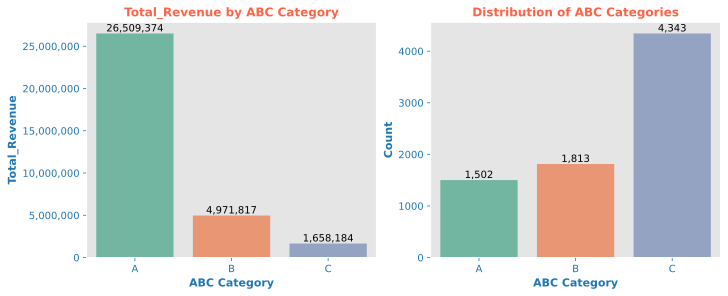

In [42]:
#define color pallete
pal_colors = sns.color_palette('Set2', 8)

def plot_abc_analysis(abc_data, estimator='Total_Revenue'):
    fig, ax = plt.subplots(1, 2)
    subplots_adjust = plt.subplots_adjust(wspace=0.3)

    # 1. Bar chart of Total Revenue by ABC Category
    barplot = sns.barplot(
        x='ABC_Category', y=estimator, estimator=sum, data=abc_data,
        ax=ax[0], order=['A', 'B', 'C'], hue='ABC_Category', palette='Set2', ci=None
    )
    ax[0].set_title(f'{estimator} by ABC Category')
    ax[0].set_ylabel(estimator)
    ax[0].set_xlabel('ABC Category')
    ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
    # Add value labels on bars
    for p in barplot.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax[0].annotate(
                f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black'
            )

    # 2. Countplot of ABC Category distribution
    countplot = sns.countplot(
        x='ABC_Category', data=abc_data, ax=ax[1],
        order=['A', 'B', 'C'], hue='ABC_Category', palette='Set2'
    )
    ax[1].set_title('Distribution of ABC Categories')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel('ABC Category')
    # Add value labels on bars
    for p in countplot.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax[1].annotate(
                f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black'
            )
    plt.show()

plot_abc_analysis(abc_analysis)

def plot_abc_line(abc_data, item='Item', estimator= 'Total_Revenue'):
    # sort by estimator and build running ranks / cumulative %
    data = abc_data.sort_values(estimator, ascending=False).reset_index()
    data['rank'] = np.arange(1, len(data) + 1)
    data['Cumulative_Number_Items_Percent'] = data['rank'] / len(data)

    # make sure we have cumulative revenue %
    if 'Cumulative_Revenue_Percent' not in data.columns:
        total = data[estimator].sum()
        data['Cumulative_Revenue_Percent'] = data[estimator].cumsum() / total if total else 0.0

    x = np.arange(len(data))  # numeric x so line & bars align

    fig, ax1 = plt.subplots(figsize=(14, 5))

    # bars: estimator
    sns.barplot(x=x, y=estimator, data=data, hue="ABC_Category", palette='Set2', ax=ax1)
    ax1.set_ylabel(estimator)
    ax1.set_xlabel(item)
    ax1.set_xticks([])

    # line: cumulative revenue %, colored by ABC
    ax2 = ax1.twinx()
    sns.lineplot(
        x=x, y='Cumulative_Revenue_Percent',
        color=pal_colors[3],
        data=data, ax=ax2
    )
    ax2.set_ylabel('Cumulative Revenue %')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f'{v:.0%}'))
    ax2.set_ylim(0, 1)

    ax1.set_title(f'{estimator} (bars) with ABC Cumulative Line')
    ax2.legend(title='ABC Category', bbox_to_anchor=(1.02, 1), loc='upper left')
    fig.tight_layout()
    plt.show()

plot_abc_line(abc_analysis, item='Brand')

The ABC analysis shows a strong revenue concentration among top-performing brands.

* Category A contributes around 80% of total revenue, despite representing only 14.5% of all brands.
* Category B makes up 25% of items, generating a moderate share of revenue.
* Category C includes 60.5% of brands but contributes less than 5% of total revenue.

This distribution highlights a clear cost optimization opportunity, as a small share of brands drives most of the revenue. The bar-line chart further illustrates this Pareto pattern, where cumulative revenue quickly plateaus beyond Category A.

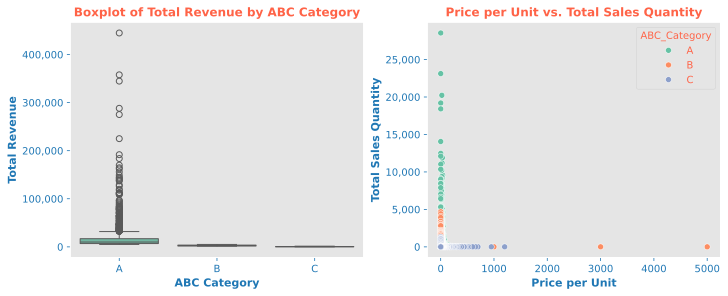

In [43]:
fix, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4)

# Boxplot of Total Revenue by ABC Category
sns.boxplot(x='ABC_Category', y='Total_Revenue', data=abc_analysis, ax=ax[0], order=['A','B','C'], palette='Set2')
ax[0].set_title('Boxplot of Total Revenue by ABC Category')
ax[0].set_ylabel('Total Revenue')
ax[0].set_xlabel('ABC Category')
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Scatter plot of Price per Unit vs. Total Sales Quantity
sns.scatterplot(x='Price_per_Unit', y='Total_Sales_Quantity', hue='ABC_Category', data=abc_analysis, ax=ax[1], palette='Set2')
ax[1].set_title('Price per Unit vs. Total Sales Quantity')
ax[1].set_ylabel('Total Sales Quantity')
ax[1].set_xlabel('Price per Unit')
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

Initially, the anomal values heavily skew the chart, we will disgards these outliers to see the underlying trends and patterns

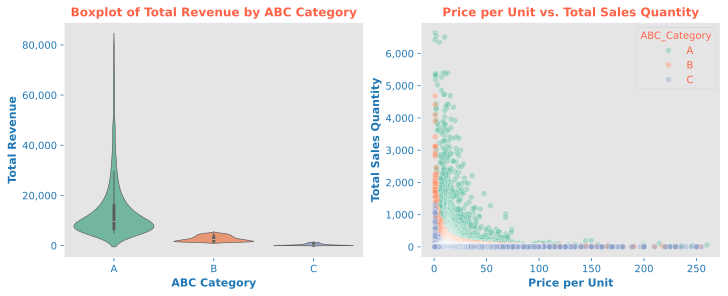

In [44]:
def get_quantile(series, quantile):
    return series.quantile(quantile)

# Remove outliers beyond 99.5th percentile for better visualization
filtered_abc = abc_analysis[(abc_analysis['Total_Revenue'] < get_quantile(abc_analysis['Total_Revenue'],0.995)) 
                            & (abc_analysis['Price_per_Unit'] < get_quantile(abc_analysis['Price_per_Unit'],0.995)) 
                            & (abc_analysis['Total_Sales_Quantity'] < get_quantile(abc_analysis['Total_Sales_Quantity'],0.995))]

fix, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4)

# Violin plot of Total Revenue by ABC Category for better distribution view
sns.violinplot(x='ABC_Category', y='Total_Revenue', data=filtered_abc, ax=ax[0], order=['A','B','C'], palette='Set2')
ax[0].set_title('Boxplot of Total Revenue by ABC Category')
ax[0].set_ylabel('Total Revenue')
ax[0].set_xlabel('ABC Category')
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Scatter plot of Price per Unit vs. Total Sales Quantity
sns.scatterplot(x='Price_per_Unit', y='Total_Sales_Quantity', hue='ABC_Category', alpha=0.4, data=filtered_abc, ax=ax[1], palette='Set2')
ax[1].set_title('Price per Unit vs. Total Sales Quantity')
ax[1].set_ylabel('Total Sales Quantity')
ax[1].set_xlabel('Price per Unit')
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

The charts highlight distinct performance patterns across categories:

* Category A brands generally show high sales quantity with low to medium price per unit, driving most of the total revenue.
* Category B follows with lower sales quantity and overall lower prices, indicating moderate performance.
* Category C contains most of the high-priced brands (above $150) but contributes minimally to total revenue due to low sales volume.

The violin plot further illustrates the revenue distribution across categories, while the filters applied a more notably affect Category A as it has smaller brand count.

#### 5.1.2. ABC Classification by Store
For ABC Classification by Store, we will use Total Revenue as the estimator.

In [45]:
stores_abc_data = sales[['InventoryId', 'Store', 'Brand', 'SalesQuantity', 'SalesPrice','SalesDollars']]
stores_abc_analysis = stores_abc_data.groupby(['Store']).agg(
    Total_Revenue=('SalesDollars', 'sum'),
    Total_Transactions=('SalesDollars', 'count')
)
stores_abc_analysis['Revenue_per_Transaction'] = stores_abc_analysis['Total_Revenue'] / stores_abc_analysis['Total_Transactions']
stores_abc_analysis = stores_abc_analysis.sort_values(by='Total_Revenue', ascending=False)
stores_abc_analysis['Cumulative_Revenue_Percent'] = stores_abc_analysis['Total_Revenue'].cumsum()/stores_abc_analysis['Total_Revenue'].sum()
store_abc_range = {
    'A': (0, 0.7),
    'B': (0.7, 0.9),
    'C': (0.9, 1.0)
}
stores_abc_analysis['ABC_Category'] = stores_abc_analysis.apply(lambda row: classify_abc(row, abc_range=store_abc_range), axis=1)
display(stores_abc_analysis.sample(10))

Total_Revenue  Total_Transactions  Revenue_per_Transaction  Cumulative_Revenue_Percent ABC_Category
Store                                                                                                     
60         841530.75               22483                37.429647                    0.430132            A
46         114644.87                5278                21.721271                    0.980461            C
48         273768.73                8288                33.031941                    0.834908            B
9          405376.85               13807                29.360241                    0.628364            A
32         393499.74               14108                27.891958                    0.652381            A
11         791786.64               25753                30.745414                    0.454024            A
17         302043.43               13563                22.269662                    0.766095            A
67        1117046.85               28649                38.990780                    0.347910            A
71         333370.30               12296                27.112093                    0.727900            A
24         129131.06                5440                23.737327                    0.969802            C

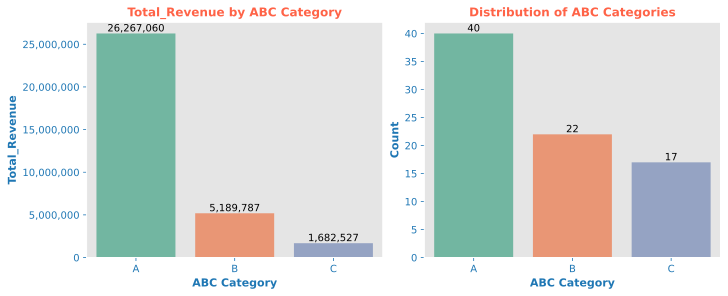

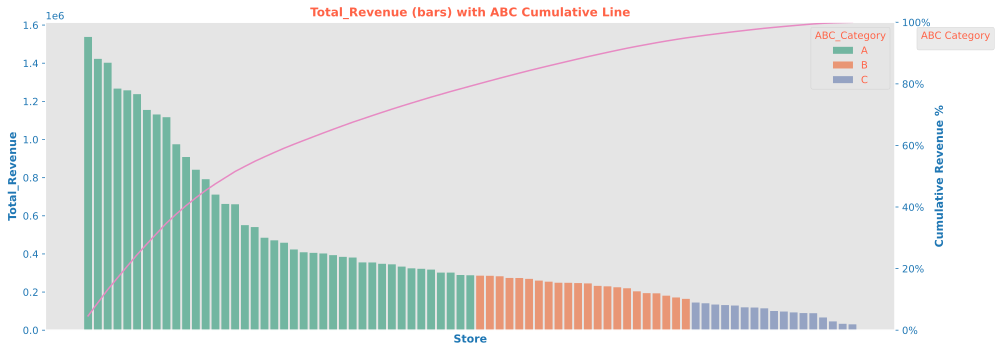

In [46]:
plot_abc_analysis(stores_abc_analysis)
plot_abc_line(stores_abc_analysis, item='Store')

The ABC analysis indicates relatively small variation in total revenue across store categories.

* Category A contributes about 70% of total revenue and represents 50% of all stores.
* Category B covers 27.8% of stores, generating roughly 20% of total revenue.
* Category C accounts for 21.5% of stores, contributing only 10% of total revenue.

The bar-line chart further illustrates this relationship, showing how revenue contribution gradually declines across categories while the cumulative revenue curve flattens beyond Category A.

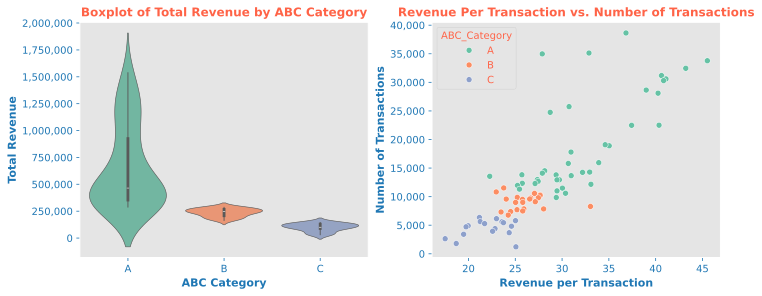

In [47]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.3)

# Violin plot of Total Revenue by ABC Category
sns.violinplot(x='ABC_Category', y='Total_Revenue', data=stores_abc_analysis, ax=ax[0], order=['A','B','C'], palette='Set2')
ax[0].set_title('Boxplot of Total Revenue by ABC Category')
ax[0].set_ylabel('Total Revenue')
ax[0].set_xlabel('ABC Category')
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Scatter plot of Revenue per Transaction vs. Total Transactions
sns.scatterplot(x='Revenue_per_Transaction', y='Total_Transactions', hue='ABC_Category', data=stores_abc_analysis, ax=ax[1], palette='Set2')
ax[1].set_title('Revenue Per Transaction vs. Number of Transactions')
ax[1].set_xlabel('Revenue per Transaction')
ax[1].set_ylabel('Number of Transactions')
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

The violin and scatter plots provide deeper insight into performance across categories:

* Category A shows the widest distribution of total revenue, supported by both higher revenue per transaction and larger transaction volumes, confirming its dominant role in overall performance.
* Category B presents moderate revenue levels with lower transaction counts, suggesting mid-tier store activity.
* Category C remains low in both revenue and transaction volume, indicating minimal contribution to sales.

Together, the plots highlight that Category A’s success is driven by both high-value and high-frequency transactions, while Categories B and C have limited growth potential under current conditions.

### 5.2. Lead Time Analysis
Lead time measures the duration between when a purchase order (PO) is placed and when goods are received in stores, reflecting supplier and logistical efficiency.

* Lead Time = Receiving Date − PO Date

This analysis examines both brand-level and vendor-level lead times to detect consistency, variability, and potential risks that impact inventory planning and replenishment cycles.

#### 5.2.1. Lead Time Analysis by Brand

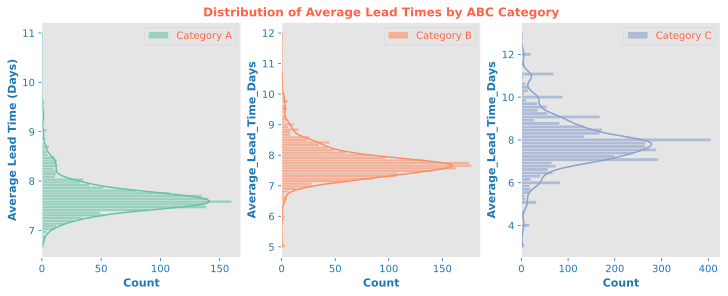

In [48]:
# Calculate Lead Time for Purchases
purchases['Lead_Time_Days'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
lead_time_summary = purchases.groupby(['Brand', 'Description']).agg(
    Average_Lead_Time_Days=('Lead_Time_Days', 'mean'),
    Min_Lead_Time_Days=('Lead_Time_Days', 'min'),
    Max_Lead_Time_Days=('Lead_Time_Days', 'max')
)

lead_time_summary['Between_Avg_Max'] = lead_time_summary['Max_Lead_Time_Days'] - lead_time_summary['Average_Lead_Time_Days']

# Get the color information 

fig, ax = plt.subplots(1,3)
plt.subplots_adjust(wspace=1)

# Histogram of Average Lead Times
merged_lead_time = lead_time_summary.merge(abc_analysis, on='Brand')

# Plot histogram for each ABC category separately
def plot_abc_distribution(data, col, i=0, color = pal_colors):
    for n, cat in enumerate(['A', 'B', 'C']):
        subset = data[data['ABC_Category'] == cat]
        sns.histplot(
            data=subset,
            y=col,
            kde=True,
            ax=ax[n+i],
            label=f'Category {cat}',
            alpha=0.6,
            color = color[n]
        )
        ax[n+i].legend()
        n+=1
plot_abc_distribution(merged_lead_time, 'Average_Lead_Time_Days')    
ax[1].set_title('Distribution of Average Lead Times by ABC Category')
ax[0].set_ylabel('Average Lead Time (Days)')
ax[0].legend()



The charts reveal a similar lead time pattern across all categories, with minor variations in range and consistency.

* Categories A and B show relatively stable lead times, mostly between 7–9 days, peaking at around 7.5 days.
* Category C, however, displays a broader and more irregular distribution, with lead times spanning 3–12 days and a peak near 8 days.

This suggests that while lead times are generally consistent for key categories (A and B), Category C may face variability in supplier or process efficiency, potentially affecting inventory planning and fulfillment.

#### 5.2.2. Lead Time Analysis by Vendor

Text(0.5, 0, 'Number of Purchases')

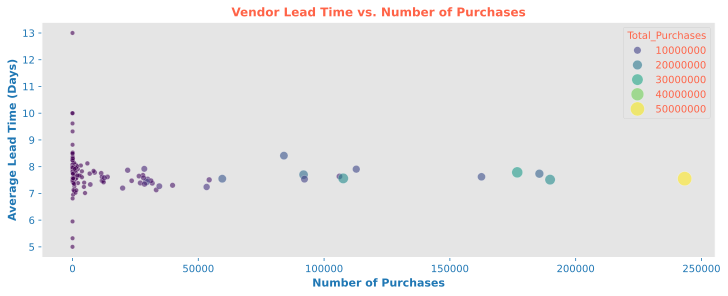

In [49]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.3)

lead_time_vendor = purchases.groupby(['VendorNumber', 'VendorName']).agg(
    Average_Lead_Time_Days=('Lead_Time_Days', 'mean'),
    Min_Lead_Time_Days=('Lead_Time_Days', 'min'),
    Max_Lead_Time_Days=('Lead_Time_Days', 'max'),
    Number_Purchases=('Lead_Time_Days', 'count'),
    Total_Purchases=('Dollars', 'sum')
).reset_index()

sns.scatterplot(
    data=lead_time_vendor,
    y='Average_Lead_Time_Days',
    x='Number_Purchases',
    size='Total_Purchases',
    sizes=(20, 200),
    alpha=0.6,
    ax=ax,
    hue='Total_Purchases',
    palette='viridis'
)
ax.set_title('Vendor Lead Time vs. Number of Purchases')
ax.set_ylabel('Average Lead Time (Days)')
ax.set_xlabel('Number of Purchases')




The chart indicates that most vendors maintain a consistent lead time of around 7–9 days, suggesting a generally stable supply chain.
A cluster of high-volume vendors falls within this range, contributing to the majority of total purchases.

A few outliers appear on both ends of the lead-time axis — some with shorter lead times (<7 days) and others with longer delays (>10 days). However, these vendors typically exhibit low purchase frequency and smaller total purchase values, indicating their limited operational impact on overall procurement performance.

This distribution implies that key suppliers are performing reliably, while outliers may represent one-off or low-priority transactions rather than systemic inefficiencies.

### 5.3. Inventory Analysis

#### 5.3.1. Inventory Turnover and Days of Inventory on Hand.
Inventory turnover and DOH are key indicators of inventory efficiency.

* Inventory Turnover measures how many times stock is sold and replaced within a given period.
* Days of Inventory on Hand (DOH) represents the number of days current inventory can sustain sales


##### a. Inventory Turnover and Days of Inventory on Hand for Brands
To calculate Inventory Turnover and Days of Inventory on Hand for Brand, we use the following formulas:
* Inventory Turnover = Total Sales Quantity / ((Begining Inventory On Hand Quantity + Ending Quantity On Hand Quantity) / 2)
* Days of Inventory on Hand (DSI) = Days in period / Inventory Turnover

In [50]:
beginding_inventory_data = begin_inv.groupby(['Brand', 'Description']).agg(
    onHand_Begin=('onHand', 'sum'),
    Store=('Store', 'first')
)
ending_inventory_data = end_inv.groupby(['Brand', 'Description']).agg(
    onHand_End=('onHand', 'sum')
)
#merge beginning and ending inventory
inventory_analysis_items = beginding_inventory_data.merge(ending_inventory_data, on=['Brand', 'Description'], how='outer')
inventory_analysis_items['onHand_Begin'] = inventory_analysis_items['onHand_Begin'].fillna(0)
inventory_analysis_items['onHand_End'] = inventory_analysis_items['onHand_End'].fillna(0)
# Calculate average inventory 
inventory_analysis_items['Average_Inventory'] = np.where( 
    inventory_analysis_items['onHand_Begin'] * inventory_analysis_items['onHand_End'] >0,
    (inventory_analysis_items['onHand_Begin'] + inventory_analysis_items['onHand_End']) / 2,
    np.where(inventory_analysis_items['onHand_Begin'] + inventory_analysis_items['onHand_End'] >0,
            np.where(inventory_analysis_items['onHand_Begin']>0, inventory_analysis_items['onHand_Begin'],  inventory_analysis_items['onHand_End']), 
            np.nan))

    
# Merge with sales data to get total sales quantity
inventory_analysis_items = inventory_analysis_items.merge(abc_analysis[['Total_Sales_Quantity','ABC_Category']], on=['Brand'], how='left')
# Calculate Inventory Turnover and Days of Inventory on Hand
inventory_analysis_items['Inventory_Turnover'] = np.where(
    (inventory_analysis_items['Average_Inventory'] > 0) &
    (inventory_analysis_items['Total_Sales_Quantity'] > 0),
    inventory_analysis_items['Total_Sales_Quantity'] / inventory_analysis_items['Average_Inventory'],
    np.nan
)
# Drop items with zero or missing inventory turnover
# Calculate days in the period
days_in_period = (sales['SalesDate'].max() - sales['SalesDate'].min()).days + 1 #inclusive
inventory_analysis_items['Days_of_Inventory_on_Hand'] = np.where(
    inventory_analysis_items['Inventory_Turnover'] > 0,
    days_in_period / inventory_analysis_items['Inventory_Turnover'],
    np.nan
)
display(inventory_analysis_items.head(10))

onHand_Begin  Store  onHand_End  Average_Inventory  Total_Sales_Quantity ABC_Category  Inventory_Turnover  Days_of_Inventory_on_Hand
Brand                                                                                                                                      
58            281.0    1.0       385.0              333.0                 288.0            B            0.864865                  69.375000
60            288.0    1.0       146.0              217.0                 124.0            B            0.571429                 105.000000
61             12.0   61.0        12.0               12.0                  24.0            C            2.000000                  30.000000
62            384.0    1.0       459.0              421.5                 162.0            A            0.384342                 156.111111
63            365.0    1.0       442.0              403.5                 131.0            A            0.324659                 184.809160
72            151.0    1.0       139.0              145.0                  19.0            C            0.131034                 457.894737
75             18.0    1.0         7.0               12.5                   3.0            C            0.240000                 250.000000
77           1261.0    1.0      1764.0             1512.5                 908.0            A            0.600331                  99.944934
79            902.0    1.0       995.0              948.5                 416.0            A            0.438587                 136.802885
82             24.0   34.0         0.0               24.0                   3.0            C            0.125000                 480.000000

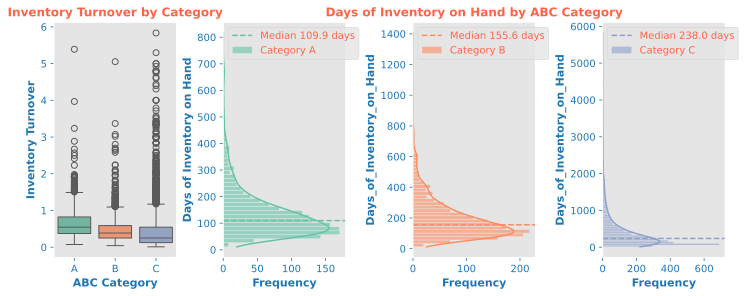

In [51]:
# Plot Inventory Turnover and Days of Inventory on Hand by ABC Category
# Fix outliers beyond 99.5th percentile for better visualization
filtered_inventory = inventory_analysis_items[
    (inventory_analysis_items['Inventory_Turnover'] < get_quantile(inventory_analysis_items['Inventory_Turnover'],0.995)) &
    (inventory_analysis_items['Days_of_Inventory_on_Hand'] < get_quantile(inventory_analysis_items['Days_of_Inventory_on_Hand'],0.995))   
]  
fig, ax = plt.subplots(1,4)
plt.subplots_adjust(wspace=1)
# Boxplot of Inventory Turnover by ABC Category
sns.boxplot(x='ABC_Category', y='Inventory_Turnover', data=filtered_inventory, ax=ax[0], order=['A','B','C'], palette='Set2')
ax[0].set_title('Inventory Turnover by Category')
ax[0].set_ylabel('Inventory Turnover')
ax[0].set_xlabel('ABC Category')

# Distribution of Days of Inventory on Hand by ABC Category
plot_abc_distribution(filtered_inventory, 'Days_of_Inventory_on_Hand',1)
for n, cat in enumerate(['A', 'B', 'C']):
    subset = filtered_inventory[filtered_inventory['ABC_Category'] == cat]
    m = subset['Days_of_Inventory_on_Hand'].median(),
    ax[n+1].axhline(m, color=pal_colors[n], linestyle='--', label=f'Median {m[0]:.1f} days')
    ax[n+1].set_xlabel('Frequency')
    ax[n+1].legend()
ax[2].set_title('Days of Inventory on Hand by ABC Category')
ax[1].set_ylabel('Days of Inventory on Hand')
plt.show()

The charts provide key insights into inventory performance across categories.

* Category A shows the highest and broadest inventory turnover, indicating efficient stock movement and stronger demand.
* Category B performs moderately, while Category C shows the lowest turnover, with several outliers exhibiting unusually high ratios, possibly due to irregular sales or data anomalies.

The Days of Inventory on Hand charts reveal that all categories maintain high inventory levels, with median values exceeding 100 days — specifically, around 110 days for A, 156 days for B, and 238 days for C.
Such extended holding periods suggest potential inefficiencies in stock management, likely contributing to elevated carrying costs and reduced capital efficiency.

##### b. Inventory Turnover and Days of Inventory on Hand by Store
Because items have varying markup ratios, store-level turnover is calculated using inventory value rather than quantity:
* Inventory Turnover = (Total Cost of Good Sold) / (Average Inventory Value) = Sum(Sales Quantity * Purchase Price)/ Sum( Average Inventory * Purchase Price)
* Days of Inventory on Hand = Days in period / Inventory Turnover

In [52]:
# Calculate Total Cost of Goods Sold (COGS)
purchases_prices = purchases.groupby(['Brand', 'InventoryId', 'Store']).agg(
    PurchasePrice=('PurchasePrice', 'mean')
).reset_index()
store_cogs = sales.groupby(['Store', 'Brand', 'InventoryId']).agg(
    Total_Sales_Quantity=('SalesQuantity', 'sum')
).reset_index()
store_cogs = store_cogs.merge(purchases_prices, on=['Store', 'Brand', 'InventoryId'], how='left')
store_cogs['COGS'] = store_cogs['Total_Sales_Quantity'] * store_cogs['PurchasePrice']
store_inventory_summary = store_cogs.groupby(['Store']).agg(
    Total_COGS=('COGS', 'sum')
).reset_index()


# Calculate Beginning and Ending Inventory per Store
store_inventory_begin = begin_inv.groupby(['Store', 'Brand', 'InventoryId']).agg(
    onHand_Begin=('onHand', 'sum')
).reset_index()
store_inventory_end = end_inv.groupby(['Store', 'Brand', 'InventoryId']).agg(
    onHand_End=('onHand', 'sum')
).reset_index()
inventory_cost = store_inventory_begin.merge(store_inventory_end, on=['Store', 'Brand', 'InventoryId'], how='outer')
# Calculate Average Inventory
inventory_cost['Average_Inventory'] = (inventory_cost['onHand_Begin'].fillna(0) + inventory_cost['onHand_End'].fillna(0)) / 2
# Merge with Purchase Price to calculate Average Inventory Cost
inventory_cost = inventory_cost.merge(purchases_prices, on=['Store', 'Brand', 'InventoryId'], how='left')
inventory_cost['Average_Inventory_Cost'] = inventory_cost['Average_Inventory'] * inventory_cost['PurchasePrice'].fillna(0)

# Aggregate Average Inventory Cost per Store
inventory_cost_summary = inventory_cost.groupby(['Store']).agg(
    Total_Average_Inventory_Cost=('Average_Inventory_Cost', 'sum')
).reset_index()

# Merge COGS and Average Inventory Cost to calculate Inventory Turnover Ratio
store_inventory_summary = store_inventory_summary.merge(inventory_cost_summary, on='Store', how='left')
store_inventory_summary['Inventory_Turnover_Ratio'] = np.where(store_inventory_summary['Total_Average_Inventory_Cost'] > 0,
                                                             store_inventory_summary['Total_COGS'] / store_inventory_summary['Total_Average_Inventory_Cost'],
                                                             np.nan)
# Calculate Days of Inventory on Hand
store_inventory_summary['Days_of_Inventory_on_Hand'] = np.where(store_inventory_summary['Total_COGS']>0,days_in_period / store_inventory_summary['Inventory_Turnover_Ratio'], np.nan)
store_inventory_summary = store_inventory_summary.merge( stores_abc_analysis.reset_index()[['Store','ABC_Category']], on='Store', how='left' )
display(store_inventory_summary.head(10))


Store  Total_COGS  Total_Average_Inventory_Cost  Inventory_Turnover_Ratio  Days_of_Inventory_on_Hand ABC_Category
0      1   632702.13                    649639.745                  0.973928                  61.606217            A
1      2   265966.08                    554420.780                  0.479719                 125.073268            A
2      3    19834.95                     81774.355                  0.242557                 247.364440            C
3      4   147699.37                    499510.600                  0.295688                 202.916478            B
4      5    61859.72                    149697.800                  0.413231                 145.197359            C
5      6   297491.95                    462003.685                  0.643917                  93.179735            A
6      7   242242.63                    506132.065                  0.478615                 125.361601            A
7      8   162918.54                    353454.875                  0.460932                 130.171143            B
8      9   269253.32                    456758.365                  0.589487                 101.783339            A
9     10   778580.15                    861094.145                  0.904175                  66.358805            A

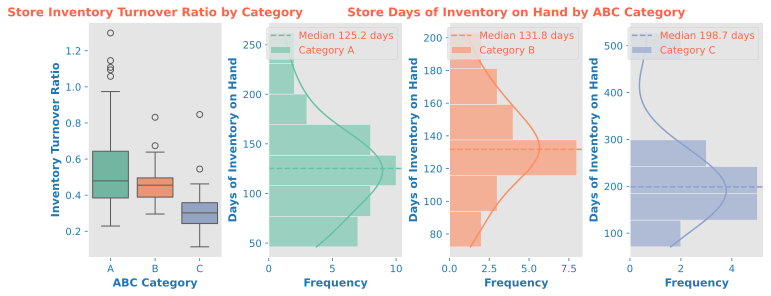

In [53]:
# Plot Store Inventory Turnover Ratio and Days of Inventory on Hand
fig, ax = plt.subplots(1,4)
plt.subplots_adjust(wspace=1)
# Boxplot of Inventory Turnover Ratio by ABC Category
sns.boxplot(x='ABC_Category', y='Inventory_Turnover_Ratio', data=store_inventory_summary, ax=ax[0], order=['A','B','C'], palette='Set2')
ax[0].set_title('Store Inventory Turnover Ratio by Category')
ax[0].set_ylabel('Inventory Turnover Ratio')
ax[0].set_xlabel('ABC Category')

# Distribution of Days of Inventory on Hand by ABC Category
plot_abc_distribution(store_inventory_summary,'Days_of_Inventory_on_Hand',1)
for n, cat in enumerate(['A', 'B', 'C']):
    subset = store_inventory_summary[store_inventory_summary['ABC_Category'] == cat]
    m = subset['Days_of_Inventory_on_Hand'].median(),
    ax[n+1].axhline(m, color=pal_colors[n], linestyle='--', label=f'Median {m[0]:.1f} days')
    ax[n+1].set_ylabel('Days of Inventory on Hand')
    ax[n+1].set_xlabel('Frequency')
    ax[n+1].legend()

ax[2].set_title('Store Days of Inventory on Hand by ABC Category')
plt.show()

The charts reveal consistent inventory patterns across categories.

* The store inventory turnover ratio shows limited variation both within and across the three categories, suggesting relatively uniform stock movement efficiency at the store level.
* However, the Days of Inventory on Hand highlights a potential issue: all categories maintain high inventory durations — medians of 125 days for Category A, 132 days for Category B, and 199 days for Category C.

These prolonged holding times point to elevated inventory carrying costs and possible inefficiencies in replenishment or demand forecasting across the network.

#### 5.3.2. Safety Stock and Reorder Point
Safety stock and reorder point calculations help prevent stockouts caused by demand and supply variability

* Safety Stock Level = (Max Lead Time * Max Daily Sale Quantity) - (Average Lead Time * Average Daily Sales Quantity)
* Reorder Point = Average Lead Time * Average Daily Sale Quantity + Safety Stock

These measures determine when to replenish stock and how much buffer inventory is needed for uncertain conditions.

In [54]:
# Calculate Daily Sales 
demand = sales.groupby(['Brand', 'SalesDate']).agg(
    Daily_Sales_Quantity=('SalesQuantity', 'sum'),
).reset_index()

# Get max daily sales per brand
stock_data = demand.groupby('Brand').agg(
    Max_Daily_Sales_Quantity=('Daily_Sales_Quantity', 'max'),
    Average_Daily_Sales_Quantity=('Daily_Sales_Quantity', 'sum')
)
# Calulate average daily sales quantity
stock_data['Average_Daily_Sales_Quantity'] = stock_data['Average_Daily_Sales_Quantity'] / days_in_period
# Get max lead time per brand
stock_data = stock_data.merge(lead_time_summary.reset_index()[['Brand','Max_Lead_Time_Days', 'Average_Lead_Time_Days']], on='Brand',  how='left')

stock_data['Safety_Stock'] = (stock_data['Max_Daily_Sales_Quantity'] * stock_data['Max_Lead_Time_Days']) - (stock_data['Average_Daily_Sales_Quantity'] * stock_data['Average_Lead_Time_Days'])
stock_data['Reorder_Point'] = stock_data['Average_Daily_Sales_Quantity'] * stock_data['Average_Lead_Time_Days'] + stock_data['Safety_Stock']
# Merge data for Average Inventory and ABC Labels
stock_data = stock_data.merge(inventory_analysis_items.reset_index()[['Brand','Average_Inventory','ABC_Category']], on='Brand', how='inner').dropna(subset=['Average_Inventory','Reorder_Point','ABC_Category'])

display(stock_data.head())


Brand  Max_Daily_Sales_Quantity  Average_Daily_Sales_Quantity  Max_Lead_Time_Days  Average_Lead_Time_Days  Safety_Stock  Reorder_Point  Average_Inventory ABC_Category
0     58                        17                      4.800000                14.0                7.758389    200.759732          238.0              333.0            B
1     60                         9                      2.066667                13.0                7.659794    101.169759          117.0              217.0            B
2     61                        12                      0.400000                12.0                8.115385    140.753846          144.0               12.0            C
3     62                        11                      2.700000                12.0                7.331570    112.204762          132.0              421.5            A
4     63                        10                      2.183333                12.0                7.324427    104.008333          120.0              403.5            A

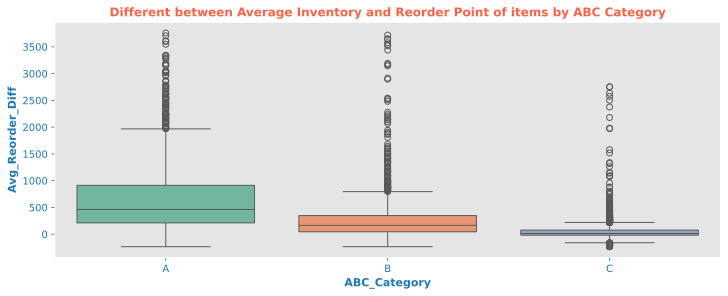

In [55]:

# Calculate different between Average Inventory and Reorder Point
box_data = stock_data[['Average_Inventory','Reorder_Point','ABC_Category']]
box_data['Avg_Reorder_Diff'] = stock_data['Average_Inventory'] - stock_data['Reorder_Point']

# Filter out top 0.5% and bottom 0.5% for better visualisation
filtered_data = box_data[(box_data['Avg_Reorder_Diff'] > get_quantile(box_data['Avg_Reorder_Diff'],0.05)) &(box_data['Avg_Reorder_Diff'] < get_quantile(box_data['Avg_Reorder_Diff'],0.995))]


sns.boxplot(x='ABC_Category', y='Avg_Reorder_Diff', data=filtered_data, order=['A','B','C'], palette='Set2')
plt.title('Different between Average Inventory and Reorder Point of items by ABC Category')

plt.show()


The boxplot illustrates the variance between average inventory levels and reorder points across categories, highlighting how closely stock quantities align with replenishment thresholds.

* Category A shows the largest differences, suggesting greater flexibility or buffer stock maintained for critical, high-demand items.
* Category B presents moderate variation, reflecting more controlled replenishment patterns.
* Category C exhibits the smallest differences, implying tighter inventory control or lower replenishment frequency for less critical items.

Overall, the results indicate that replenishment strategies are more actively managed for Category A, focusing attention and resources on the most impactful inventory segments.

#### 5.3.3. Target Inventory Level and Inventory Status
The Target Inventory Level (TIL) represents the planned quantity of stock required to meet expected demand during a review period, accounting for average lead time and an additional safety buffer.

In this analysis, we assume a 30-day review period, meaning stock levels are evaluated and replenished every 30 days.
* Target Inventory Level = Average Daily Sale * (30 days + Average Lead Time) + Safety Level

Based on this benchmark, each item is categorized as:
* 'Shortage' if Inventory Level < Reorder Point
* 'Optimal' if Reorder Point < Inventory Level < Target Level
* 'Surplus' if Inventory Level > Target Level

This framework helps assess whether current stock levels are aligned with operational needs and supports decision-making for optimizing inventory holding costs and service performance.

Inventory_Status  Optimal  Surplus  Shortage
ABC_Category                                
A                     338      898       283
B                     270     1168       393
C                     216     2041      1514
Total                 824     4107      2190

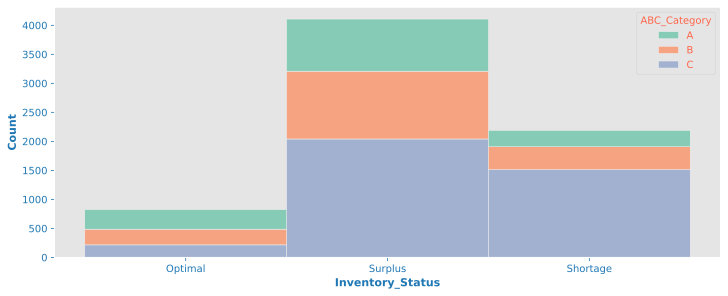

In [56]:
# Calculate Target Level
stock_data['Target_Level'] = stock_data['Average_Daily_Sales_Quantity'] * (30 + stock_data['Average_Lead_Time_Days']) + stock_data['Safety_Stock']
stock_data['Inventory_Status'] = np.where(stock_data['Average_Inventory']>stock_data['Target_Level'], 'Surplus', 
                                         np.where(stock_data['Average_Inventory']>=stock_data['Reorder_Point'], 'Optimal', 'Shortage'))
display(stock_data[['Inventory_Status','ABC_Category']].value_counts().reset_index().pivot_table(
    index='ABC_Category',
    columns='Inventory_Status',
    values='count',
    aggfunc='sum',
    margins=True,
    margins_name='Total'
    ).reindex(columns=['Optimal','Surplus','Shortage']))
sns.histplot(data=stock_data,
            x='Inventory_Status',
            hue='ABC_Category',
            hue_order=['A','B','C'],
            palette='Set2',
            multiple='stack')

plt.show()

The pivot table and stacked chart provide a clear view of inventory status across categories. The results reveal significant inventory inefficiency:

* Nearly 60% of brands have excess inventory, indicating potential overstocking and high holding costs.
* Around 30% of brands are in shortage, suggesting risks of stockouts and unmet demand.
* Only 11.5% of brands maintain an optimal inventory balance, highlighting room for improvement in inventory planning and replenishment strategies.

### 5.4. Performance Analysis
This section identifies the best and worst-performing brands, stores, and vendors by evaluating total revenue, sales quantity, lead time, and inventory turnover. The results guide management focus toward high-impact products and suppliers while highlighting areas for performance improvement.

In this analysis, Total Revenue is used as the estimator to rank brands and stores. Vendors are ranked by their total supplied stock value.

#### 5.4.1. Brand Performance Analysis
##### a. Best Performing Brands

In [57]:
# brand, total revenue, total sales quantity, avg lead time, max lead time, inventory turnover, days of inventory, inventory status, description, vendorNumber
def get_top_n_revenue_items(n, worst):
    top_n = abc_analysis.sort_values('Total_Revenue', ascending=worst).reset_index(drop=False)[['Brand', 'Total_Revenue','Total_Sales_Quantity']].head(n)
    top_n = top_n.merge(lead_time_summary.reset_index()[['Brand','Average_Lead_Time_Days','Max_Lead_Time_Days']], how='left', on='Brand')
    top_n = top_n.merge(inventory_analysis_items.reset_index()[['Brand','Inventory_Turnover','Days_of_Inventory_on_Hand']], how='left', on='Brand')
    top_n = top_n.merge(stock_data.reset_index()[['Brand','Inventory_Status']], how='left', on='Brand')
    top_n = top_n.merge(inventory_items[['Brand','Description','VendorNumber']], how='left', on='Brand')
    top_n = top_n.rename(columns={
        'Total_Revenue': 'Total Revenue',
        'Total_Sales_Quantity': 'Sales Quantity',
        'Average_Lead_Time_Days': 'Avg Lead Time',
        'Max_Lead_Time_Days':'Max Lead Time',
        'Inventory_Turnover' :'Inv Turnover',
        'Days_of_Inventory_on_Hand': 'Days of Inv',
        'Inventory_Status': 'Inv Status'
    })
    if worst:
        best_worst = 'Worst'
        top_bottom = 'Bottom'
    else:
        best_worst = 'Best'
        top_bottom = 'Top'

    print(f'{top_bottom} {str(n)} {best_worst} Performing Brands based on Revenue')
    display(top_n.round(2))
    total_revenue = sales['SalesDollars'].sum()
    contribute= np.round(top_n['Total Revenue'].sum()/total_revenue *100,3)
    account = np.round(n/len(inventory_items)*100,2)
    print(f'The above brands account for {account}% of brands and constribute {str(contribute)}% of the overall revenue')

get_top_n_revenue_items(n=10, worst=False)

Top 10 Best Performing Brands based on Revenue


Brand  Total Revenue  Sales Quantity  Avg Lead Time  Max Lead Time  Inv Turnover  Days of Inv Inv Status                Description  VendorNumber
0   4261      444810.74           20226           7.34             14          1.25        47.86   Shortage     Capt Morgan Spiced Rum          3960
1   3545      357759.17           11883           7.36             14          0.76        78.94    Optimal            Ketel One Vodka          3960
2   1233      344712.22            9578           7.44             14          0.71        84.77    Surplus    Jack Daniels No 7 Black          1128
3   8068      288135.11           11189           7.39             14          0.72        82.98    Surplus           Absolut 80 Proof         17035
4   3405      275162.97            9203           7.56             14          0.89        67.62    Optimal      Tito's Handmade Vodka          4425
5   3858      225014.22            9378           7.62             14          0.77        77.57    Optimal           Grey Goose Vodka           480
6   2589      191669.51            4649           7.49             14          0.63        94.78   Shortage      Jameson Irish Whiskey         17035
7   4227      183659.91           10209           7.58             14          2.67        22.47   Shortage  Bacardi Superior Rum Trav           480
8   1376      169922.38            7362           7.34             14          0.60       100.06    Surplus                   Jim Beam         12546
9   2585      164426.60            6940           7.51             14          0.73        82.20   Shortage      Jameson Irish Whiskey         17035

The above brands account for 0.09% of brands and constribute 7.982% of the overall revenue


The top 10 best-performing brands generate revenues ranging from $445,000 to $164,000, contributing 7.98% of total revenue. All share a consistent average lead time of 7.3–7.6 days and a maximum lead time of 14 days, important considerations for inventory planning. Among these, 4 brands are in shortage, 3 are optimal, and 3 are in surplus, indicating clear opportunities for inventory optimization even within top sellers.

Inventory efficiency varies notably, with turnover ratios from 0.6 to 2.7 and days of inventory on hand between 22 and 100 days. While some brands, such as Bacardi Superior Rum Trav, turn over quickly, others maintain excess stock that may elevate holding costs.

Vendor analysis shows strong concentration: Vendor 3960 supplies the top two brands, Vendor 17035 provides three, and Vendor 480 supplies two. Strengthening partnerships and negotiations with these key suppliers can help secure availability and support sustained revenue performance.
##### b. Worst Performing Brands

In [58]:
get_top_n_revenue_items(n=20, worst=True)

Bottom 20 Worst Performing Brands based on Revenue


Brand  Total Revenue  Sales Quantity  Avg Lead Time  Max Lead Time  Inv Turnover  Days of Inv Inv Status                  Description  VendorNumber
0    5287           0.98               2            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
1    3303           0.99               1            NaN            NaN          0.05       1320.0        NaN                          NaN           NaN
2    2773           0.99               1            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
3    8872           0.99               1            NaN            NaN          0.12        480.0        NaN                          NaN           NaN
4    3933           1.98               2            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
5    8729           1.98               2           8.00            8.0          1.00         60.0   Shortage    Smirnoff Light Strawberry        3960.0
6    3623           1.98               2            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
7    3407           1.98               2            NaN            NaN          0.67         90.0        NaN                          NaN           NaN
8    2134           2.49               1            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
9   22407           3.29               1           6.50            8.0          0.04       1500.0    Surplus           Three Wishes Chard        9815.0
10   5456           3.96               4            NaN            NaN          0.05       1252.5        NaN                          NaN           NaN
11   3697           3.98               2           8.00            8.0          0.05       1230.0    Surplus        Ciroc Pineapple Vodka        3960.0
12  13716           3.99               1           8.22           12.0          0.14        420.0   Shortage          Tisdale Vyds Pnt Nr        3252.0
13  20609           3.99               1            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
14  18627           4.39               1          10.00           10.0          0.10        630.0    Optimal                Viberti Chard        9165.0
15  16935           4.49               1            NaN            NaN          1.00         60.0        NaN                          NaN           NaN
16   8268           4.49               1           7.49           12.0          0.03       1830.0    Surplus   Paul Masson Chablis Carafe        1392.0
17    105           4.49               1            NaN            NaN          0.11        570.0        NaN                          NaN           NaN
18  27934           4.99               1          11.00           11.0           NaN          NaN        NaN  Terruzzi & Puthod Vernaccia        4425.0
19  22120           4.99               1           6.00            6.0          0.06       1020.0    Surplus    Don Simon Selecion Shiraz        4425.0

The above brands account for 0.19% of brands and constribute 0.0% of the overall revenue


The bottom 20 worst-performing brands each generated less than $5 in total revenue during the analysis period, collectively contributing 0.0% of overall sales. Many records lack key details such as vendor, description, and lead time, indicating these are likely obsolete or inactive stock that have not been replenished for an extended time.

Several of these brands show very low inventory turnover (0.03–0.14) and extremely high days of inventory (up to 1,800 days), confirming long-term stagnation in movement. These products represent clear candidates for inventory cleanup or liquidation, which would help free warehouse space and reduce unnecessary carrying and holding costs.

#### 5.4.2. Store Performance Analysis
##### a. Best Performing Stores

In [59]:
# Store, revenue, transactiosn,rev per trans, stock_value, Inventory turnover, days of inv, %a,b,c, city
def get_top_n_stores(n, worst):
    top_n = stores_abc_analysis.reset_index()[['Store','Total_Revenue','Total_Transactions','Revenue_per_Transaction']].sort_values('Total_Revenue', ascending=worst).head(n)
    top_n = top_n.merge(store_inventory_summary.reset_index()[['Store','Total_Average_Inventory_Cost','Inventory_Turnover_Ratio','Days_of_Inventory_on_Hand']], how='left', on='Store')
    
    # Get ABC coverage %
    abc_counts = purchases_prices.merge(abc_analysis.reset_index()[['Brand','ABC_Category']], how='left', on='Brand')
    abc_counts = abc_counts.groupby('Store')['ABC_Category'].value_counts().reset_index().pivot_table(index='Store',columns='ABC_Category',values='count').reset_index().rename_axis(None,axis=1)
    abc_counts = abc_counts[['Store','A','B','C']].astype(int)
    top_n = top_n.merge(abc_counts, how='left',on='Store')
   
    # Calculate percentage
    top_n['No of Items'] = top_n['A'] + top_n['B'] + top_n['C']
    top_n['A'] = top_n['A']/1502
    top_n['B'] = top_n['B']/1813
    top_n['C'] = top_n['C']/4343

    # Get City information
    top_n = top_n.merge(stores, how='left', on='Store')
    total_revenue = sales['SalesDollars'].sum()
    contribute= np.round(top_n['Total_Revenue'].sum()/total_revenue *100,3)
    account=np.round(n/len(stores)*100,2)

    # Rename columns
    top_n = top_n.rename(columns={
        'Total_Revenue': 'Total Revenue',
        'Total_Transactions': 'No of Trans',
        'Revenue_per_Transaction' : 'Revenue per Trans',
        'Total_Average_Inventory_Cost': 'Inv Value',
        'Inventory_Turnover_Ratio': 'Inv Tunrover',
        'Days_of_Inventory_on_Hand': 'Days of Inv',
        'A': '%A',
        'B': '%B',
        'C': '%C'
    })
    if worst:
        top_bottom = 'Bottom'
        best_worst = 'Worst'
    else:
        top_bottom = 'Top'
        best_worst = 'Best'
    print(f'{top_bottom} {str(n)} {best_worst} Performing Stores based on Revenue')
    display(top_n.round(2))
    
    print(f'The above stores account for {account}% of number of stores and contribute {contribute}% of overall revenue')

get_top_n_stores(n=10, worst=False)



Top 10 Best Performing Stores based on Revenue


Store  Total Revenue  No of Trans  Revenue per Trans   Inv Value  Inv Tunrover  Days of Inv    %A    %B    %C  No of Items          City
0     34     1537806.51        33780              45.52  1876827.74          0.53       113.18  0.99  0.93  0.51         5366     PITMERDEN
1     15     1422998.94        38637              36.83   852822.02          1.11        54.17  0.98  0.81  0.23         3929      WANBORNE
2     76     1402698.59        32456              43.22  1709542.95          0.52       115.04  0.98  0.91  0.35         4634     DONCASTER
3     73     1266850.62        31184              40.63  1914795.22          0.42       141.45  0.98  0.91  0.39         4809     DONCASTER
4     66     1257824.93        30600              41.11  1777992.44          0.45       134.11  0.98  0.89  0.34         4557    EANVERNESS
5     38     1237991.19        30305              40.85  1337321.02          0.59       101.66  0.98  0.88  0.32         4470     GOULCREST
6     10     1154926.80        35130              32.88   861094.14          0.90        66.36  0.95  0.74  0.17         3501       HORNSEY
7     69     1131369.88        28104              40.26  1649237.40          0.43       140.25  0.98  0.91  0.40         4875     MOUNTMEND
8     67     1117046.85        28649              38.99  1869846.14          0.37       162.65  0.98  0.89  0.34         4580    EANVERNESS
9      1      975115.86        34975              27.88   649639.74          0.97        61.61  0.95  0.66  0.14         3231  HARDERSFIELD

The above stores account for 12.5% of number of stores and contribute 37.733% of overall revenue


The table provide important insights of the Top 10 Best Performing Stores:
* These stores generate $0.98M–$1.54M each and, together, account for 12.5% of all stores but 37.73% of total revenue.
* Over the 60-day period they process 28k–39k transactions (~467–650/day), with revenue/transaction ≥ $32 for all except Store 1 ($27.88).
* Stock on hand is substantial: 7/10 stores carry >$1.3M in inventory value.
* Inventory turnover is mostly low; only Stores 15, 10, and 1 show moderate turnover—indicating scope to trim store inventory, lower carrying costs, and free up working capital.
* Item availability is strong for A/B categories across the group.
* Doncaster features two top-performing stores, signaling a local demand cluster worth deeper capacity and assortment planning.

##### b. Worst Performing Store

In [60]:
get_top_n_stores(n=20, worst=True)

Bottom 20 Worst Performing Stores based on Revenue


Store  Total Revenue  No of Trans  Revenue per Trans  Inv Value  Inv Tunrover  Days of Inv    %A    %B    %C  No of Items          City
0       3       30556.67         1219              25.07   81774.36          0.24       247.36  0.22  0.05  0.01          468       HORNSEY
1      26       33599.00         1798              18.69  180085.62          0.12       508.86  0.62  0.11  0.01         1158  KNIFE'S EDGE
2      29       46191.93         2639              17.50  135924.89          0.22       276.03  0.63  0.15  0.01         1263     AYLESBURY
3      37       66599.43         3419              19.48  209518.94          0.21       290.71  0.76  0.24  0.02         1664   PAETHSMOUTH
4      28       89100.76         3947              22.57  214848.06          0.27       219.54  0.58  0.10  0.01         1091      LARNWICK
5      36       89840.08         3690              24.35  194228.28          0.30       198.75  0.70  0.13  0.02         1359         LEWES
6       5       93172.39         4721              19.74  149697.80          0.41       145.20  0.70  0.18  0.02         1448        SUTTON
7      45       97909.56         4904              19.97  182294.26          0.36       167.50  0.68  0.14  0.01         1323       VERITAS
8      52      100529.88         4402              22.84  225114.36          0.29       205.92  0.79  0.26  0.03         1784      GRAYCOTT
9      46      114644.87         5278              21.72   81612.65          0.85        70.86  1.39  0.38  0.04         2947   TYWARDREATH
10     63      118779.89         4830              24.59  244720.84          0.33       183.92  0.78  0.23  0.02         1658    SWORDBREAK
11     44      119822.27         5639              21.25  690729.96          0.11       527.09  0.95  0.76  0.14         3399    PORTHCRAWL
12     24      129131.06         5440              23.74  293421.50          0.29       209.66  0.75  0.22  0.03         1641    PALPERROTH
13     57      131875.87         5593              23.58  267305.74          0.33       183.67  0.78  0.21  0.03         1664     LANTEGLOS
14     43      134537.44         6356              21.17  196500.78          0.46       129.78  0.76  0.21  0.02         1598       WOLFORD
15     70      141196.68         6142              22.99  296160.76          0.32       189.92  0.85  0.32  0.03         1973          KELD
16     65      145039.86         5797              25.02  170155.68          0.54       110.17  0.72  0.16  0.02         1478         LUTON
17     18      164133.11         6770              24.24  173050.60          0.64        93.96  0.72  0.18  0.02         1496       FURNESS
18     40      171739.16         7315              23.48  226739.04          0.50       120.92  0.78  0.27  0.03         1797       BULLMAR
19     35      180839.57         7381              24.50  287049.41          0.41       146.07  0.78  0.24  0.04         1789     HALIVAARA

The above stores account for 25.0% of number of stores and contribute 6.636% of overall revenue


The table above also provide valuable information about the bottom 20 worst performing stores:
* These stores represent 25% of all locations but contribute only 6.64% of total revenue (about $30k–$181k per store over 60 days).
* They handle 1.2k–7.4k transactions (~20–123/day) with revenue/transaction ~$18.7–$25.5—meaning the shortfall is driven more by low traffic/volume than ticket size.
* Inventory is heavy relative to sales: values of $82k–$691k, low turnover (0.11–0.85), and long Days of Inventory (70–527 days)—tying up working capital.
* Assortment/availability of A/B items appears lower and more volatile than top stores (with some anomalies), suggesting suboptimal mix and replenishment.

To lift thoughput and reduce carrying cost, these stores should set tighter reorder policies, streamline SKUs (prioritize A items), rebalance inventory levels, and improve local demand generation (promo/placement)
#### 5.4.3. Vendor Performance Analysis
##### a. Best Performing Vendors

In [61]:
def get_n_vendor(n,worst):
    top_n = lead_time_vendor.reset_index()[['VendorNumber','VendorName','Total_Purchases','Number_Purchases','Average_Lead_Time_Days','Max_Lead_Time_Days']].sort_values('Total_Purchases', ascending=worst).head(n)    
    
    #Calculate ABC %
    abc_count= inventory_items.merge(abc_analysis.reset_index()[['Brand','ABC_Category']], how='left', on='Brand')
    abc_count = abc_count.groupby('VendorNumber')['ABC_Category'].value_counts().fillna(0)
    abc_count = abc_count.reset_index().pivot_table(index='VendorNumber', columns='ABC_Category', values='count').reset_index().rename_axis(None, axis=1)
    abc_count['No of Items'] = abc_count['A'] + abc_count['B'] + abc_count['C']
    abc_count['%A'] = abc_count['A'] / abc_count['No of Items']
    abc_count['%B'] = abc_count['B'] / abc_count['No of Items']
    abc_count['%C'] = abc_count['C'] / abc_count['No of Items']

    # Merge to get ABC %
    top_n = top_n.merge(abc_count[['VendorNumber','No of Items','%A','%B','%C']], how='left', on='VendorNumber')

    # Rename columns
    top_n = top_n.rename(columns={
        'Total_Purchases' : 'Supplied Value',
        'Number_Purchases': 'No of Order',
        'Average_Lead_Time_Days': 'Avg Lead Time',
        'Max_Lead_Time_Days':'Max Lead Time'
    })

    if worst:
        top_bottom = 'Bottom'
        best_worst = 'Worst'
    else:
        top_bottom = 'Top'
        best_worst = 'Best'
    print(f'{top_bottom} {str(n)} {best_worst} Performing Vendor by Stock Supplied')
    display(top_n.round(2))
    contribute = np.round(top_n['Supplied Value'].sum() / lead_time_vendor['Total_Purchases'].sum()*100, 3)
    account = np.round(n/len(vendors)*100, 2)
    print(f'The above vendors account for {account}% of vendors and contribute {contribute}% of overall stock value supplied')

get_n_vendor(10, worst=False)

Top 10 Best Performing Vendor by Stock Supplied


VendorNumber                  VendorName  Supplied Value  No of Order  Avg Lead Time  Max Lead Time  No of Items    %A    %B    %C
0          3960    DIAGEO NORTH AMERICA INC     50959796.85       243326           7.55             14        318.0  0.56  0.22  0.22
1          4425       MARTIGNETTI COMPANIES     27861690.02       176781           7.79             14        950.0  0.15  0.24  0.62
2         12546     JIM BEAM BRANDS COMPANY     24203151.05       189832           7.51             14        305.0  0.41  0.25  0.35
3         17035           PERNOD RICARD USA     24124091.56       107612           7.56             14        211.0  0.33  0.29  0.37
4           480             BACARDI USA INC     17624378.72        91846           7.70             14        141.0  0.39  0.29  0.32
5          1392    CONSTELLATION BRANDS INC     15573917.90       185574           7.74             14        348.0  0.25  0.32  0.43
6          1128           BROWN-FORMAN CORP     13529433.08        59525           7.55             14         97.0  0.46  0.22  0.32
7          9165  ULTRA BEVERAGE COMPANY LLP     13210613.93        84034           8.41             14        518.0  0.12  0.29  0.59
8          3252          E & J GALLO WINERY     12289608.09       162567           7.62             14        363.0  0.23  0.34  0.43
9          9552              M S WALKER INC     10935817.30       112792           7.91             14        538.0  0.13  0.21  0.66

The above vendors account for 7.81% of vendors and contribute 65.335% of overall stock value supplied


The top 10 vendors represent 7.69% of total vendors but supply 65.34% of total stock value, underscoring their strategic weight in the supply base. Supplied values range from $10.9M to $50.9M, with average lead times of 7.5–8.4 days and a maximum of 14 days, reflecting stable and predictable delivery performance.

ABC category distribution shows that a large share of their supplied volume belongs to A-category items (e.g., Diageo at 54% A, Jim Beam at 39%, Pernod Ricard at 33%), aligning these vendors closely with the company’s high-revenue and fast-moving products. Vendors such as MARTIGNETTI and ULTRA BEVERAGE, while contributing significantly, have higher proportions of B and C items, offering opportunities for SKU and order mix optimization.

DIAGEO NORTH AMERICA INC alone accounts for nearly 25% of total supplied value, followed by MARTIGNETTI and JIM BEAM. This concentration provides both a leverage point for strategic partnerships and a dependency risk that should be monitored through diversified sourcing strategies and strong vendor agreements.
##### b. Worst Performing Vendors

In [62]:
get_n_vendor(20, worst=True)

Bottom 20 Worst Performing Vendor by Stock Supplied


VendorNumber                     VendorName  Supplied Value  No of Order  Avg Lead Time  Max Lead Time  No of Items  %A  %B  %C
0         201359             FLAVOR ESSENCE INC           17.00            1          13.00             13          NaN NaN NaN NaN
1           1439         CAPSTONE INTERNATIONAL           54.64            1           8.00              8          NaN NaN NaN NaN
2          90026         SILVER MOUNTAIN CIDERS           77.18            2           8.50              9          NaN NaN NaN NaN
3             54    AAPER ALCOHOL & CHEMICAL CO          105.07            1          10.00             10          NaN NaN NaN NaN
4          90033        FANTASY FINE WINES CORP          128.64            2           7.50              9          NaN NaN NaN NaN
5           4901            LAUREATE IMPORTS CO          140.94            1          10.00             10          NaN NaN NaN NaN
6           9099                   TRUETT HURST          236.64            1           5.00              5          NaN NaN NaN NaN
7           1265         BLACK ROCK SPIRITS LLC         1152.10           19           8.05             12          NaN NaN NaN NaN
8            200      AMERICAN SPIRITS EXCHANGE         1205.16            8           8.25             11          NaN NaN NaN NaN
9           5612        MILTONS DISTRIBUTING CO         1824.18           23           7.96             11          NaN NaN NaN NaN
10          1003            BRONCO WINE COMPANY         2071.90           49           7.84             12          NaN NaN NaN NaN
11          5083               LOYAL DOG WINERY         2320.80           20           5.95             12          NaN NaN NaN NaN
12           287           APPOLO VINEYARDS LLC         2399.70           18           7.44             12          NaN NaN NaN NaN
13          8663           STAR INDUSTRIES INC.         2452.29           17           8.24             13          NaN NaN NaN NaN
14          6280                       UNCORKED         2966.31           16           8.31             12          NaN NaN NaN NaN
15          9751             VINEDREA WINES LLC         4657.60           33           8.82             12          NaN NaN NaN NaN
16         90052          HAUNTING WHISPER VYDS         5388.58           58           7.97             12          NaN NaN NaN NaN
17          3551    GILMANTON WINERY & VINEYARD         5393.04           43           8.00             10          NaN NaN NaN NaN
18          3951    HIGHLAND WINE MERCHANTS LLC         5500.32           28           5.32              9          NaN NaN NaN NaN
19             2  IRA GOLDMAN AND WILLIAMS, LLP         5630.88           13           9.62             11          NaN NaN NaN NaN

The above vendors account for 15.62% of vendors and contribute 0.014% of overall stock value supplied


The bottom 20 vendors account for 15.38% of total vendors but contribute just 0.014% of total stock value, indicating minimal impact on overall supply. Their supplied values range from $17 to $5,631, with most vendors supplying only a handful of items and orders.

While their lead times (5–13 days) are comparable to top vendors, the extremely low order volume and value suggest these are inactive, obsolete, or low-priority suppliers. Many also lack ABC category distribution data, reinforcing their marginal role in revenue generation.

These vendors represent clear candidates for vendor base rationalization, helping reduce administrative overhead and simplify procurement processes without significantly affecting supply availability or sales performance.

## 6. Key Insights and Interpretation
This section summarizes the main findings from the Exploratory Data Analysis. The analysis focused on four core areas — ABC Classification, Lead Time, Inventory Structure, and Performance at the item, store, and vendor levels. Together, these insights provide a clear picture of the company’s inventory and supply chain efficiency, highlight optimization opportunities, and inform strategic decisions.
### 6.1. ABC Classification
The ABC analysis confirms a highly skewed value distribution typical of retail and distribution businesses:
* A-category brands represent a small proportion of SKUs but contribute to the majority of revenue and movement, aligning with the Pareto principle (70–80% contribution).
* B- and C-category brands are far more numerous but contribute less significantly to total value, indicating clear prioritization opportunities in inventory management and resource allocation.
* A-category availability is consistently high across top-performing stores, supporting sustained sales volume.
* ABC distribution also highlights vendor and store dependency patterns, which are important for procurement and inventory planning strategies
### 6.2. Lead Time Analysis
* Average lead time across brands and vendors is 7–8 days, with a maximum of 14 days, which aligns well with the assumed 30-day review cycle.
* Top vendors maintain stable and predictable lead times, enabling more accurate safety stock and reorder point calculations.
* Lead time variability is higher among low-performing vendors and brands, often coupled with missing data, reflecting unreliable or inactive suppliers.
* This stability among top vendors can be leveraged to lower buffer stocks and improve capital efficiency, while unstable suppliers should be reviewed for replacement or consolidation.
### 6.3. Inventory Analysis
* Inventory status shows 60% of SKUs in surplus, 30% in shortage, and only 11.5% at optimal levels, indicating significant misalignment between inventory levels and demand.
* Inventory turnover ratios remain low to moderate for most SKUs and stores (commonly between 0.5–1.1), leading to high Days of Inventory (50–150 days).
* Many high-revenue brands are still in surplus or shortage, signaling inefficient inventory control rather than demand issues.
* Safety stock, reorder point, and target inventory calculations reveal that a large share of brands hold more than target levels, inflating carrying costs.
* Conversely, shortage brands signal missed sales opportunities and customer service risks.

These findings suggest strong potential for rebalancing stock, improving forecast accuracy, and applying ABC-based inventory policies.
### 6.4. Performance Analysis
#### a. Brand Performance
* The top 10 best-performing brands generated $164K–$445K each, contributing around 8% of total revenue. They show mixed inventory statuses (shortage, surplus, optimal), indicating both missed opportunities and excess costs.
* Inventory turnover among these top brands is higher than average but still shows room for improvement.
* A few key vendors supply multiple top brands, emphasizing procurement concentration.

The worst-performing brands contribute negligible revenue and show incomplete vendor and lead time data, indicating obsolete or stagnant stock. These are prime candidates for inventory cleanup or discontinuation.
#### b. Store Performance
* The top 10 stores, representing just 12.5% of the total store network, generate 37.7% of total revenue.
* These stores have high transaction volumes, solid revenue per transaction, and strong A-category coverage but low inventory turnover and high stock values—signaling capital inefficiencies.
* Doncaster city has two top-performing stores, suggesting a regional concentration worth leveraging strategically.

The bottom 20 stores, comprising 25% of stores, contribute only 6.6% of revenue, show weak A-category availability, and exhibit poor turnover rates. These stores are candidates for inventory rationalization, promotion campaigns, or operational restructuring.
#### c. Vendor Performance
* The top 10 vendors, accounting for only 7.69% of the vendor base, supply 65.34% of total stock value with stable lead times and high proportions of A-category brands. This makes them strategic partners that should be prioritized for long-term agreements and negotiation leverage.
* DIAGEO NORTH AMERICA INC alone contributes nearly a quarter of total stock value, signaling both strategic importance and supply concentration risk.
* The bottom 20 vendors, despite being 15.38% of the vendor base, contribute only 0.014% of stock value and supply mostly inactive or low-value brands. These can be deactivated or consolidated to reduce procurement complexity.
### 6.5. Strategic Implications
1. Inventory Optimization
    * Rebalancing surplus and shortage SKUs will free up working capital and reduce carrying costs.
    * Dynamic stocking strategies, particularly for A-category brands, can improve service levels while minimizing excess.
2. ABC-Driven Prioritization
    * Focus forecasting, replenishment, and working capital allocation on A-category SKUs, stores, and vendors.
    * Rationalize B- and C-category SKUs to reduce complexity and cost.
3. Supplier Portfolio Management
    * Strengthen strategic partnerships with top-performing vendors.
    * Phase out or merge low-impact vendors to streamline the supply chain.
4. Store Network Optimization
    * Reallocate inventory and marketing resources to high-performing stores.
    * Review or restructure underperforming locations to improve profitability.
5. Process and Policy Alignment
    * Stable lead times enable better planning—integrating lead time data into safety stock and reorder policies can significantly reduce inefficiencies.
    * Introduce differentiated replenishment strategies for A/B/C brands to increase responsiveness and capital efficiency.
## 7. Assumptions and Limitations
### 7.1. Assumptions
* 30-day review period: The analysis assumes a fixed 30-day stock review cycle for calculating target inventory levels.
* Stable demand pattern: Historical sales data is assumed to be representative of current and near-future demand, without accounting for seasonality or promotions.
* Lead time consistency: Vendor lead times are considered stable and based on historical averages, with maximum lead time assumed to cover potential delays.
* Data completeness for key fields: Where information was missing (e.g., lead time for low-volume brands), calculations used averages or were excluded from sensitive metrics.
* Standard costing: Inventory valuation and performance calculations use recorded purchase prices without adjusting for potential cost fluctuations or discounts
### 7.2. Limitations
* Historical scope only: The analysis is based on historical transactional data and does not include demand forecasting or future planning scenarios.
* Missing or incomplete data: Several low-revenue brands and vendors lacked descriptive or lead time data, limiting the depth of their analysis.
* Static review period: The 30-day review period may not reflect actual operational cycles across all brands or stores.
* No seasonality or external factors: The analysis does not account for marketing events, seasonal demand spikes, or supply disruptions.
* Exclusion of financial costs beyond stock value: Carrying costs, stockout costs, and opportunity costs were not fully quantified in monetary terms

These assumptions and limitations provide important context for interpreting the findings and highlight areas where further analysis, such as forecasting or cost modeling, could strengthen future decision-making
## 8. Evaluation Against Project Scope and Objectives
This project aimed to evaluate and optimize inventory management efficiency across four dimensions: ABC classification, lead time analysis, inventory structure, and performance analysis. All planned analyses were fully executed and aligned with the initial scope and objectives.
### 8.1. Scope Evaluation
* ABC Classification (*Completed*): Identified Pareto distribution across brands, stores, and vendors; prioritized A-category for inventory control.
* Lead Time Analysis (*Completed*): Measured vendor lead times; top vendors showed stable performance (7–8 days), highlighting consolidation opportunities.
* Inventory Analysis (*Completed*): Calculated key KPIs (turnover, DOI, safety stock, reorder point); revealed 60% surplus, 30% shortage, 11.5% optimal stock.
* Performance Analysis (*Completed*): Identified top and bottom performers across brands, stores, and vendors; mapped revenue contribution and inefficiencies.
### 8.2. Objective Evaluation
* Identify high-value segments (*Completed*): Top 10 brands and stores drive a large share of revenue.
* Evaluate supplier reliability (*Completed*): Vendor performance assessed; top 10 supply 65% of stock value.
* Assess inventory efficiency (*Completed*): Turnover and DOI calculated; clear surplus/shortage patterns identified
* Determine optimal stock levels (*Completed*): Safety stock and target levels computed for planning.
* Provide actionable recommendations (*Completed*): Strategies proposed for inventory rebalancing, vendor consolidation, and store optimization. 

Overall, the project successfully achieved its objectives and delivered actionable insights to enhance inventory strategy, procurement planning, and operational performance.
## 9. Next Steps (Analytics and Handover)
* Parameter calibration: Refit Safety Stock, ROP, and Target Level quarterly using refreshed demand and lead-time data.
* Dashboarding: Publish a KPI dashboard (A-item service level, Surplus/Shortage %, Turnover, DOI, OTIF).
* Exception monitoring: Automate alerts for DOI > threshold, Shortage A-brands, and Lead-time variance spikes.
* Handover notes: Document ABC policy assumptions (incl. assumed 30-day review cycle), formulas, and data lineage.